In [1]:
import numpy as np
import pandas as pd

SK_data =pd.read_csv('SK.csv',header=None)
#print(SK_data.iloc[-1][[8-8,10-8,12-8,14-8,16-8,18-8,20-8,22-8,24-8,26-8,28-8,30-8,32-8]])
SK_data=SK_data.dropna()


MOMENT_data = pd.read_excel('MOMENT2.xlsx')
#print(MOMENT_data.iloc[-1][[8-8,10-8,13-8,16-8,19-8,22-8,25-8,28-8,31-8,34-8,37-8,40-8,43-8]])
MOMENT_data=MOMENT_data.dropna()


In [7]:
MOMENT_data

P1  P2  P3   L1     L2     L3       LPF      L1_real      L2_real  \
0       3   5  11    1    2.0    2.0  9.375678     9.375778    18.751556   
1       1   2  11    1    0.5    0.5  9.517813     9.517913     4.758956   
2       1   5   9    1    0.5    0.5  9.517813     9.517913     4.758956   
3       1   3   8    1    0.5    0.5  9.517813     9.517913     4.758956   
4       2   5   7    1    0.5    0.5  9.517813     9.517913     4.758956   
...    ..  ..  ..  ...    ...    ...       ...          ...          ...   
70859   2   4   9  387  387.0  387.0  9.517813  3683.432226  3683.432226   
70860   1   5  11    1    0.5    2.0  9.517813     9.517913     4.758956   
70861   4   5   7  389  389.0  778.0  9.517813  3702.468052  3702.468052   
70862   2   5   7  397  397.0  794.0  9.517813  3778.611353  3778.611353   
70863   2   5   7  397  397.0  794.0  9.517813  3778.611353  3778.611353   

           L3_real  ...          r26          r27         r28         r29  \
0        18.751556  ...    48.108100    48.108100   40.090100   32.072100   
1         4.758956  ...     0.401738     0.401738   -0.458369   -1.318480   
2         4.758956  ...    -3.748270    -3.748270   -3.123560   -2.498850   
3         4.758956  ...    -0.957396    -0.957396   -0.797830   -0.638264   
4         4.758956  ...     1.537250     1.537250    1.281050    1.024840   
...            ...  ...          ...          ...         ...         ...   
70859  3683.432226  ...    51.289900    51.289900   42.741500   34.193200   
70860    19.035825  ...    -5.156770    -5.156770   -7.469920   -9.783060   
70861  7404.936103  ...   173.381000   173.381000  144.484000  115.587000   
70862  7557.222707  ... -1102.150000 -1102.150000 -918.461000 -734.769000   
70863  7557.222707  ... -1102.150000 -1102.150000 -918.461000 -734.769000   

              r30         r31         r32         r33         r34  \
0       32.072100   24.054100   16.036000   16.036000    8.018020   
1       -1.318480   -2.178580   -3.038690   -3.038690   -1.519350   
2       -2.498850   -1.874130   -1.249420   -1.249420   -0.624711   
3       -0.638264   -0.478698   -0.319132   -0.319132   -0.159566   
4        1.024840    0.768627    0.512418    0.512418    0.256209   
...           ...         ...         ...         ...         ...   
70859   34.193200   25.644900   17.096600   17.096600    8.548310   
70860   -9.783060  -12.096200  -14.409300  -14.409300   -7.204670   
70861  115.587000   86.690300   57.793500   57.793500   28.896800   
70862 -734.769000 -551.077000 -367.385000 -367.385000 -183.692000   
70863 -734.769000 -551.077000 -367.385000 -367.385000 -183.692000   

                r35  
0      0.000000e+00  
1     -5.960000e-08  
2     -2.980000e-08  
3     -7.450000e-09  
4      1.490000e-08  
...             ...  
70859  4.770000e-07  
70860  0.000000e+00  
70861  0.000000e+00  
70862  0.000000e+00  
70863  0.000000e+00  

[70864 rows x 46 columns]

In [2]:
SK_shape=SK_data.shape
SK_N=SK_shape[0]

MOMENT_shape=MOMENT_data.shape
MOMENT_N=MOMENT_shape[0]

def get_info(X,Ls,Y,LPF,N,data,loc):
    
    for ii in range(0,N):
        q1 = int(data.iloc[ii,0])
        q2 = int(data.iloc[ii,1])
        q3 = int(data.iloc[ii,2])

        l1 = data.iloc[ii,7]
        l2 = data.iloc[ii,8]
        l3 = data.iloc[ii,9]




        X[ii,q1,0] = 1
        X[ii,q2,0] = 1
        X[ii,q3,0] = 1

        Ls[ii,0,0]=l1*0.01
        Ls[ii,1,0]=l2*0.01
        Ls[ii,2,0]=l3*0.01

        Y[ii,:] = data.iloc[ii][loc]
        LPF[ii,0]= data.iloc[ii][6]
        
        
SK_X = np.zeros((SK_N,13,1))
SK_Ls = np.zeros((SK_N,3,1))
SK_Y = np.zeros((SK_N,13))
SK_LPF = np.zeros((SK_N,1))

MOMENT_X = np.zeros((MOMENT_N,13,1))
MOMENT_Ls = np.zeros((MOMENT_N,3,1))
MOMENT_Y = np.zeros((MOMENT_N,13))
MOMENT_LPF = np.zeros((MOMENT_N,1))


ROT_loc =[10,12,14,16,18,20,22,24,26,28,30,32,34]
MOM_loc =[7,9,12,15,18,21,24,27,30,33,36,39,42]

xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]



get_info(SK_X, SK_Ls, SK_Y, SK_LPF, SK_N, SK_data,ROT_loc)
get_info(MOMENT_X, MOMENT_Ls, MOMENT_Y, MOMENT_LPF, MOMENT_N, MOMENT_data,MOM_loc)




    

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
print(SK_Ls[0])
print(SK_X[0])
SK_Y[0]
#condition=SK_data.iloc[np.where(SK_data.iloc[:][0]==2)]
#condition=condition.iloc[np.where(condition.iloc[:][1]==4)]

In [ ]:
SK_shape=SK_data.shape
SK_N=SK_shape[0]

MOMENT_shape=MOMENT_data.shape
MOMENT_N=MOMENT_shape[0] 

def get_info(X,Y,LPF,N,data,loc):
    
    for ii in range(0,N):
        for i in range(13):
            print(ii*13+i)
            q1 = int(data.iloc[ii,0])
            q2 = int(data.iloc[ii,1])
            q3 = int(data.iloc[ii,2])

            l1 = data.iloc[ii,7]
            l2 = data.iloc[ii,8]
            l3 = data.iloc[ii,9]



            X[ii*13+i,0,0] = q1
            X[ii*13+i,1,0] = q2
            X[ii*13+i,2,0] = q3

            X[ii*13+i,3,0]=l1*0.01
            X[ii*13+i,4,0]=l2*0.01
            X[ii*13+i,5,0]=l3*0.01

            X[ii*13+i,6,0]=i

            Y[ii*13+i,:] = data.iloc[ii][loc[i]]
            LPF[ii*13+i,0]= data.iloc[ii][6]
        
        
        
            
NN2_SK_X = np.zeros((SK_N*13,7,1))
NN2_SK_Y = np.zeros((SK_N*13,1))
NN2_SK_LPF = np.zeros((SK_N*13,1))

NN2_MOMENT_X = np.zeros((MOMENT_N*13,7,1))
NN2_MOMENT_Y = np.zeros((MOMENT_N*13,1))
NN2_MOMENT_LPF = np.zeros((MOMENT_N*13,1))



ROT_loc =[8,10,13,16,19,22,25,28,31,34,37,40,43]
MOM_loc =[7,9,12,15,18,21,24,27,30,33,36,39,42]

xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]


get_info(NN2_MOMENT_X,  NN2_MOMENT_Y, NN2_MOMENT_LPF, MOMENT_N, MOMENT_data,MOM_loc)
get_info(NN2_SK_X, NN2_SK_Y, NN2_SK_LPF, SK_N, SK_data,ROT_loc)




    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226


3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163


5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835


7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649


9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345


10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
1100

12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
1243

14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
1447

15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
1608

17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
1746

19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
1925

20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
2077

22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
2253

23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
2400

25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
2545

26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
2710

28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
28548
28549
28550
28551
28552
28553
28554
28555
28556
28557
28558
28559
28560
28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
28574
28575
28576
28577
28578
28579
28580
28581
28582
28583
28584
28585
28586
28587
28588
28589
28590
28591
28592
28593
28594
28595
28596
28597
28598
28599
28600
28601
28602
28603
28604
2860

30204
30205
30206
30207
30208
30209
30210
30211
30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
30295
30296
30297
30298
30299
30300
30301
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311
30312
30313
30314
30315
30316
30317
30318
30319
30320
30321
30322
30323
30324
30325
30326
30327
30328
30329
30330
30331
30332
30333
30334
30335
30336
30337
30338
30339
30340
30341
30342
30343
30344
30345
30346
30347
30348
30349
30350
30351
30352
30353
30354
30355
30356
30357
30358
30359
30360
30361
30362
30363
30364
30365
30366
30367
30368
30369
3037

31600
31601
31602
31603
31604
31605
31606
31607
31608
31609
31610
31611
31612
31613
31614
31615
31616
31617
31618
31619
31620
31621
31622
31623
31624
31625
31626
31627
31628
31629
31630
31631
31632
31633
31634
31635
31636
31637
31638
31639
31640
31641
31642
31643
31644
31645
31646
31647
31648
31649
31650
31651
31652
31653
31654
31655
31656
31657
31658
31659
31660
31661
31662
31663
31664
31665
31666
31667
31668
31669
31670
31671
31672
31673
31674
31675
31676
31677
31678
31679
31680
31681
31682
31683
31684
31685
31686
31687
31688
31689
31690
31691
31692
31693
31694
31695
31696
31697
31698
31699
31700
31701
31702
31703
31704
31705
31706
31707
31708
31709
31710
31711
31712
31713
31714
31715
31716
31717
31718
31719
31720
31721
31722
31723
31724
31725
31726
31727
31728
31729
31730
31731
31732
31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
3176

33342
33343
33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
3350

34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
3500

36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
3679

38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38254
38255
38256
38257
38258
38259
38260
38261
38262
38263
38264
38265
38266
38267
38268
38269
38270
38271
38272
38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
3831

39843
39844
39845
39846
39847
39848
39849
39850
39851
39852
39853
39854
39855
39856
39857
39858
39859
39860
39861
39862
39863
39864
39865
39866
39867
39868
39869
39870
39871
39872
39873
39874
39875
39876
39877
39878
39879
39880
39881
39882
39883
39884
39885
39886
39887
39888
39889
39890
39891
39892
39893
39894
39895
39896
39897
39898
39899
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
39915
39916
39917
39918
39919
39920
39921
39922
39923
39924
39925
39926
39927
39928
39929
39930
39931
39932
39933
39934
39935
39936
39937
39938
39939
39940
39941
39942
39943
39944
39945
39946
39947
39948
39949
39950
39951
39952
39953
39954
39955
39956
39957
39958
39959
39960
39961
39962
39963
39964
39965
39966
39967
39968
39969
39970
39971
39972
39973
39974
39975
39976
39977
39978
39979
39980
39981
39982
39983
39984
39985
39986
39987
39988
39989
39990
39991
39992
39993
39994
39995
39996
39997
39998
39999
40000
40001
40002
40003
40004
40005
40006
40007
40008
4000

41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
41782
41783
41784
41785
41786
41787
41788
41789
41790
41791
41792
41793
41794
41795
41796
41797
41798
41799
41800
41801
41802
41803
41804
41805
41806
41807
41808
41809
41810
41811
41812
41813
41814
41815
41816
41817
41818
41819
41820
41821
41822
41823
41824
41825
41826
41827
41828
41829
41830
41831
41832
41833
41834
41835
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
4185

43361
43362
43363
43364
43365
43366
43367
43368
43369
43370
43371
43372
43373
43374
43375
43376
43377
43378
43379
43380
43381
43382
43383
43384
43385
43386
43387
43388
43389
43390
43391
43392
43393
43394
43395
43396
43397
43398
43399
43400
43401
43402
43403
43404
43405
43406
43407
43408
43409
43410
43411
43412
43413
43414
43415
43416
43417
43418
43419
43420
43421
43422
43423
43424
43425
43426
43427
43428
43429
43430
43431
43432
43433
43434
43435
43436
43437
43438
43439
43440
43441
43442
43443
43444
43445
43446
43447
43448
43449
43450
43451
43452
43453
43454
43455
43456
43457
43458
43459
43460
43461
43462
43463
43464
43465
43466
43467
43468
43469
43470
43471
43472
43473
43474
43475
43476
43477
43478
43479
43480
43481
43482
43483
43484
43485
43486
43487
43488
43489
43490
43491
43492
43493
43494
43495
43496
43497
43498
43499
43500
43501
43502
43503
43504
43505
43506
43507
43508
43509
43510
43511
43512
43513
43514
43515
43516
43517
43518
43519
43520
43521
43522
43523
43524
43525
43526
4352

44909
44910
44911
44912
44913
44914
44915
44916
44917
44918
44919
44920
44921
44922
44923
44924
44925
44926
44927
44928
44929
44930
44931
44932
44933
44934
44935
44936
44937
44938
44939
44940
44941
44942
44943
44944
44945
44946
44947
44948
44949
44950
44951
44952
44953
44954
44955
44956
44957
44958
44959
44960
44961
44962
44963
44964
44965
44966
44967
44968
44969
44970
44971
44972
44973
44974
44975
44976
44977
44978
44979
44980
44981
44982
44983
44984
44985
44986
44987
44988
44989
44990
44991
44992
44993
44994
44995
44996
44997
44998
44999
45000
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
4507

46574
46575
46576
46577
46578
46579
46580
46581
46582
46583
46584
46585
46586
46587
46588
46589
46590
46591
46592
46593
46594
46595
46596
46597
46598
46599
46600
46601
46602
46603
46604
46605
46606
46607
46608
46609
46610
46611
46612
46613
46614
46615
46616
46617
46618
46619
46620
46621
46622
46623
46624
46625
46626
46627
46628
46629
46630
46631
46632
46633
46634
46635
46636
46637
46638
46639
46640
46641
46642
46643
46644
46645
46646
46647
46648
46649
46650
46651
46652
46653
46654
46655
46656
46657
46658
46659
46660
46661
46662
46663
46664
46665
46666
46667
46668
46669
46670
46671
46672
46673
46674
46675
46676
46677
46678
46679
46680
46681
46682
46683
46684
46685
46686
46687
46688
46689
46690
46691
46692
46693
46694
46695
46696
46697
46698
46699
46700
46701
46702
46703
46704
46705
46706
46707
46708
46709
46710
46711
46712
46713
46714
46715
46716
46717
46718
46719
46720
46721
46722
46723
46724
46725
46726
46727
46728
46729
46730
46731
46732
46733
46734
46735
46736
46737
46738
46739
4674

48084
48085
48086
48087
48088
48089
48090
48091
48092
48093
48094
48095
48096
48097
48098
48099
48100
48101
48102
48103
48104
48105
48106
48107
48108
48109
48110
48111
48112
48113
48114
48115
48116
48117
48118
48119
48120
48121
48122
48123
48124
48125
48126
48127
48128
48129
48130
48131
48132
48133
48134
48135
48136
48137
48138
48139
48140
48141
48142
48143
48144
48145
48146
48147
48148
48149
48150
48151
48152
48153
48154
48155
48156
48157
48158
48159
48160
48161
48162
48163
48164
48165
48166
48167
48168
48169
48170
48171
48172
48173
48174
48175
48176
48177
48178
48179
48180
48181
48182
48183
48184
48185
48186
48187
48188
48189
48190
48191
48192
48193
48194
48195
48196
48197
48198
48199
48200
48201
48202
48203
48204
48205
48206
48207
48208
48209
48210
48211
48212
48213
48214
48215
48216
48217
48218
48219
48220
48221
48222
48223
48224
48225
48226
48227
48228
48229
48230
48231
48232
48233
48234
48235
48236
48237
48238
48239
48240
48241
48242
48243
48244
48245
48246
48247
48248
48249
4825

49729
49730
49731
49732
49733
49734
49735
49736
49737
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49748
49749
49750
49751
49752
49753
49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
4989

51128
51129
51130
51131
51132
51133
51134
51135
51136
51137
51138
51139
51140
51141
51142
51143
51144
51145
51146
51147
51148
51149
51150
51151
51152
51153
51154
51155
51156
51157
51158
51159
51160
51161
51162
51163
51164
51165
51166
51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51263
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
51284
51285
51286
51287
51288
51289
51290
51291
51292
51293
5129

52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52722
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
52803
52804
52805
52806
52807
52808
52809
52810
52811
52812
52813
52814
52815
52816
52817
52818
52819
52820
52821
52822
52823
52824
52825
52826
52827
52828
52829
52830
52831
52832
52833
52834
52835
52836
52837
52838
52839
52840
52841
52842
52843
52844
52845
52846
52847
52848
52849
52850
52851
52852
52853
52854
52855
52856
52857
52858
52859
52860
52861
52862
52863
52864
52865
52866
52867
52868
52869
52870
52871
52872
5287

54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
54308
54309
54310
54311
54312
54313
54314
54315
54316
54317
54318
54319
54320
54321
54322
54323
54324
54325
54326
54327
54328
54329
54330
54331
54332
54333
54334
54335
54336
54337
54338
54339
54340
54341
54342
54343
54344
54345
54346
54347
54348
54349
54350
54351
54352
54353
54354
54355
54356
54357
54358
54359
54360
54361
54362
54363
54364
54365
54366
54367
54368
54369
54370
54371
54372
54373
54374
54375
54376
54377
54378
54379
54380
54381
54382
54383
54384
54385
54386
54387
54388
54389
54390
54391
54392
54393
54394
54395
54396
54397
54398
54399
54400
54401
54402
54403
54404
54405
54406
54407
54408
54409
54410
54411
54412
54413
54414
54415
54416
54417
54418
54419
54420
54421
54422
54423
54424
54425
54426
54427
54428
54429
54430
54431
54432
54433
54434
54435
54436
54437
54438
54439
54440
54441
54442
54443
54444
54445
54446
54447
54448
54449
54450
54451
54452
54453
54454
5445

55882
55883
55884
55885
55886
55887
55888
55889
55890
55891
55892
55893
55894
55895
55896
55897
55898
55899
55900
55901
55902
55903
55904
55905
55906
55907
55908
55909
55910
55911
55912
55913
55914
55915
55916
55917
55918
55919
55920
55921
55922
55923
55924
55925
55926
55927
55928
55929
55930
55931
55932
55933
55934
55935
55936
55937
55938
55939
55940
55941
55942
55943
55944
55945
55946
55947
55948
55949
55950
55951
55952
55953
55954
55955
55956
55957
55958
55959
55960
55961
55962
55963
55964
55965
55966
55967
55968
55969
55970
55971
55972
55973
55974
55975
55976
55977
55978
55979
55980
55981
55982
55983
55984
55985
55986
55987
55988
55989
55990
55991
55992
55993
55994
55995
55996
55997
55998
55999
56000
56001
56002
56003
56004
56005
56006
56007
56008
56009
56010
56011
56012
56013
56014
56015
56016
56017
56018
56019
56020
56021
56022
56023
56024
56025
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
56036
56037
56038
56039
56040
56041
56042
56043
56044
56045
56046
56047
5604

57354
57355
57356
57357
57358
57359
57360
57361
57362
57363
57364
57365
57366
57367
57368
57369
57370
57371
57372
57373
57374
57375
57376
57377
57378
57379
57380
57381
57382
57383
57384
57385
57386
57387
57388
57389
57390
57391
57392
57393
57394
57395
57396
57397
57398
57399
57400
57401
57402
57403
57404
57405
57406
57407
57408
57409
57410
57411
57412
57413
57414
57415
57416
57417
57418
57419
57420
57421
57422
57423
57424
57425
57426
57427
57428
57429
57430
57431
57432
57433
57434
57435
57436
57437
57438
57439
57440
57441
57442
57443
57444
57445
57446
57447
57448
57449
57450
57451
57452
57453
57454
57455
57456
57457
57458
57459
57460
57461
57462
57463
57464
57465
57466
57467
57468
57469
57470
57471
57472
57473
57474
57475
57476
57477
57478
57479
57480
57481
57482
57483
57484
57485
57486
57487
57488
57489
57490
57491
57492
57493
57494
57495
57496
57497
57498
57499
57500
57501
57502
57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
57514
57515
57516
57517
57518
57519
5752

59212
59213
59214
59215
59216
59217
59218
59219
59220
59221
59222
59223
59224
59225
59226
59227
59228
59229
59230
59231
59232
59233
59234
59235
59236
59237
59238
59239
59240
59241
59242
59243
59244
59245
59246
59247
59248
59249
59250
59251
59252
59253
59254
59255
59256
59257
59258
59259
59260
59261
59262
59263
59264
59265
59266
59267
59268
59269
59270
59271
59272
59273
59274
59275
59276
59277
59278
59279
59280
59281
59282
59283
59284
59285
59286
59287
59288
59289
59290
59291
59292
59293
59294
59295
59296
59297
59298
59299
59300
59301
59302
59303
59304
59305
59306
59307
59308
59309
59310
59311
59312
59313
59314
59315
59316
59317
59318
59319
59320
59321
59322
59323
59324
59325
59326
59327
59328
59329
59330
59331
59332
59333
59334
59335
59336
59337
59338
59339
59340
59341
59342
59343
59344
59345
59346
59347
59348
59349
59350
59351
59352
59353
59354
59355
59356
59357
59358
59359
59360
59361
59362
59363
59364
59365
59366
59367
59368
59369
59370
59371
59372
59373
59374
59375
59376
59377
5937

60848
60849
60850
60851
60852
60853
60854
60855
60856
60857
60858
60859
60860
60861
60862
60863
60864
60865
60866
60867
60868
60869
60870
60871
60872
60873
60874
60875
60876
60877
60878
60879
60880
60881
60882
60883
60884
60885
60886
60887
60888
60889
60890
60891
60892
60893
60894
60895
60896
60897
60898
60899
60900
60901
60902
60903
60904
60905
60906
60907
60908
60909
60910
60911
60912
60913
60914
60915
60916
60917
60918
60919
60920
60921
60922
60923
60924
60925
60926
60927
60928
60929
60930
60931
60932
60933
60934
60935
60936
60937
60938
60939
60940
60941
60942
60943
60944
60945
60946
60947
60948
60949
60950
60951
60952
60953
60954
60955
60956
60957
60958
60959
60960
60961
60962
60963
60964
60965
60966
60967
60968
60969
60970
60971
60972
60973
60974
60975
60976
60977
60978
60979
60980
60981
60982
60983
60984
60985
60986
60987
60988
60989
60990
60991
60992
60993
60994
60995
60996
60997
60998
60999
61000
61001
61002
61003
61004
61005
61006
61007
61008
61009
61010
61011
61012
61013
6101

62253
62254
62255
62256
62257
62258
62259
62260
62261
62262
62263
62264
62265
62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
62286
62287
62288
62289
62290
62291
62292
62293
62294
62295
62296
62297
62298
62299
62300
62301
62302
62303
62304
62305
62306
62307
62308
62309
62310
62311
62312
62313
62314
62315
62316
62317
62318
62319
62320
62321
62322
62323
62324
62325
62326
62327
62328
62329
62330
62331
62332
62333
62334
62335
62336
62337
62338
62339
62340
62341
62342
62343
62344
62345
62346
62347
62348
62349
62350
62351
62352
62353
62354
62355
62356
62357
62358
62359
62360
62361
62362
62363
62364
62365
62366
62367
62368
62369
62370
62371
62372
62373
62374
62375
62376
62377
62378
62379
62380
62381
62382
62383
62384
62385
62386
62387
62388
62389
62390
62391
62392
62393
62394
62395
62396
62397
62398
62399
62400
62401
62402
62403
62404
62405
62406
62407
62408
62409
62410
62411
62412
62413
62414
62415
62416
62417
62418
6241

63924
63925
63926
63927
63928
63929
63930
63931
63932
63933
63934
63935
63936
63937
63938
63939
63940
63941
63942
63943
63944
63945
63946
63947
63948
63949
63950
63951
63952
63953
63954
63955
63956
63957
63958
63959
63960
63961
63962
63963
63964
63965
63966
63967
63968
63969
63970
63971
63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
63982
63983
63984
63985
63986
63987
63988
63989
63990
63991
63992
63993
63994
63995
63996
63997
63998
63999
64000
64001
64002
64003
64004
64005
64006
64007
64008
64009
64010
64011
64012
64013
64014
64015
64016
64017
64018
64019
64020
64021
64022
64023
64024
64025
64026
64027
64028
64029
64030
64031
64032
64033
64034
64035
64036
64037
64038
64039
64040
64041
64042
64043
64044
64045
64046
64047
64048
64049
64050
64051
64052
64053
64054
64055
64056
64057
64058
64059
64060
64061
64062
64063
64064
64065
64066
64067
64068
64069
64070
64071
64072
64073
64074
64075
64076
64077
64078
64079
64080
64081
64082
64083
64084
64085
64086
64087
64088
64089
6409

65658
65659
65660
65661
65662
65663
65664
65665
65666
65667
65668
65669
65670
65671
65672
65673
65674
65675
65676
65677
65678
65679
65680
65681
65682
65683
65684
65685
65686
65687
65688
65689
65690
65691
65692
65693
65694
65695
65696
65697
65698
65699
65700
65701
65702
65703
65704
65705
65706
65707
65708
65709
65710
65711
65712
65713
65714
65715
65716
65717
65718
65719
65720
65721
65722
65723
65724
65725
65726
65727
65728
65729
65730
65731
65732
65733
65734
65735
65736
65737
65738
65739
65740
65741
65742
65743
65744
65745
65746
65747
65748
65749
65750
65751
65752
65753
65754
65755
65756
65757
65758
65759
65760
65761
65762
65763
65764
65765
65766
65767
65768
65769
65770
65771
65772
65773
65774
65775
65776
65777
65778
65779
65780
65781
65782
65783
65784
65785
65786
65787
65788
65789
65790
65791
65792
65793
65794
65795
65796
65797
65798
65799
65800
65801
65802
65803
65804
65805
65806
65807
65808
65809
65810
65811
65812
65813
65814
65815
65816
65817
65818
65819
65820
65821
65822
65823
6582

67223
67224
67225
67226
67227
67228
67229
67230
67231
67232
67233
67234
67235
67236
67237
67238
67239
67240
67241
67242
67243
67244
67245
67246
67247
67248
67249
67250
67251
67252
67253
67254
67255
67256
67257
67258
67259
67260
67261
67262
67263
67264
67265
67266
67267
67268
67269
67270
67271
67272
67273
67274
67275
67276
67277
67278
67279
67280
67281
67282
67283
67284
67285
67286
67287
67288
67289
67290
67291
67292
67293
67294
67295
67296
67297
67298
67299
67300
67301
67302
67303
67304
67305
67306
67307
67308
67309
67310
67311
67312
67313
67314
67315
67316
67317
67318
67319
67320
67321
67322
67323
67324
67325
67326
67327
67328
67329
67330
67331
67332
67333
67334
67335
67336
67337
67338
67339
67340
67341
67342
67343
67344
67345
67346
67347
67348
67349
67350
67351
67352
67353
67354
67355
67356
67357
67358
67359
67360
67361
67362
67363
67364
67365
67366
67367
67368
67369
67370
67371
67372
67373
67374
67375
67376
67377
67378
67379
67380
67381
67382
67383
67384
67385
67386
67387
67388
6738

68616
68617
68618
68619
68620
68621
68622
68623
68624
68625
68626
68627
68628
68629
68630
68631
68632
68633
68634
68635
68636
68637
68638
68639
68640
68641
68642
68643
68644
68645
68646
68647
68648
68649
68650
68651
68652
68653
68654
68655
68656
68657
68658
68659
68660
68661
68662
68663
68664
68665
68666
68667
68668
68669
68670
68671
68672
68673
68674
68675
68676
68677
68678
68679
68680
68681
68682
68683
68684
68685
68686
68687
68688
68689
68690
68691
68692
68693
68694
68695
68696
68697
68698
68699
68700
68701
68702
68703
68704
68705
68706
68707
68708
68709
68710
68711
68712
68713
68714
68715
68716
68717
68718
68719
68720
68721
68722
68723
68724
68725
68726
68727
68728
68729
68730
68731
68732
68733
68734
68735
68736
68737
68738
68739
68740
68741
68742
68743
68744
68745
68746
68747
68748
68749
68750
68751
68752
68753
68754
68755
68756
68757
68758
68759
68760
68761
68762
68763
68764
68765
68766
68767
68768
68769
68770
68771
68772
68773
68774
68775
68776
68777
68778
68779
68780
68781
6878

70394
70395
70396
70397
70398
70399
70400
70401
70402
70403
70404
70405
70406
70407
70408
70409
70410
70411
70412
70413
70414
70415
70416
70417
70418
70419
70420
70421
70422
70423
70424
70425
70426
70427
70428
70429
70430
70431
70432
70433
70434
70435
70436
70437
70438
70439
70440
70441
70442
70443
70444
70445
70446
70447
70448
70449
70450
70451
70452
70453
70454
70455
70456
70457
70458
70459
70460
70461
70462
70463
70464
70465
70466
70467
70468
70469
70470
70471
70472
70473
70474
70475
70476
70477
70478
70479
70480
70481
70482
70483
70484
70485
70486
70487
70488
70489
70490
70491
70492
70493
70494
70495
70496
70497
70498
70499
70500
70501
70502
70503
70504
70505
70506
70507
70508
70509
70510
70511
70512
70513
70514
70515
70516
70517
70518
70519
70520
70521
70522
70523
70524
70525
70526
70527
70528
70529
70530
70531
70532
70533
70534
70535
70536
70537
70538
70539
70540
70541
70542
70543
70544
70545
70546
70547
70548
70549
70550
70551
70552
70553
70554
70555
70556
70557
70558
70559
7056

71764
71765
71766
71767
71768
71769
71770
71771
71772
71773
71774
71775
71776
71777
71778
71779
71780
71781
71782
71783
71784
71785
71786
71787
71788
71789
71790
71791
71792
71793
71794
71795
71796
71797
71798
71799
71800
71801
71802
71803
71804
71805
71806
71807
71808
71809
71810
71811
71812
71813
71814
71815
71816
71817
71818
71819
71820
71821
71822
71823
71824
71825
71826
71827
71828
71829
71830
71831
71832
71833
71834
71835
71836
71837
71838
71839
71840
71841
71842
71843
71844
71845
71846
71847
71848
71849
71850
71851
71852
71853
71854
71855
71856
71857
71858
71859
71860
71861
71862
71863
71864
71865
71866
71867
71868
71869
71870
71871
71872
71873
71874
71875
71876
71877
71878
71879
71880
71881
71882
71883
71884
71885
71886
71887
71888
71889
71890
71891
71892
71893
71894
71895
71896
71897
71898
71899
71900
71901
71902
71903
71904
71905
71906
71907
71908
71909
71910
71911
71912
71913
71914
71915
71916
71917
71918
71919
71920
71921
71922
71923
71924
71925
71926
71927
71928
71929
7193

73691
73692
73693
73694
73695
73696
73697
73698
73699
73700
73701
73702
73703
73704
73705
73706
73707
73708
73709
73710
73711
73712
73713
73714
73715
73716
73717
73718
73719
73720
73721
73722
73723
73724
73725
73726
73727
73728
73729
73730
73731
73732
73733
73734
73735
73736
73737
73738
73739
73740
73741
73742
73743
73744
73745
73746
73747
73748
73749
73750
73751
73752
73753
73754
73755
73756
73757
73758
73759
73760
73761
73762
73763
73764
73765
73766
73767
73768
73769
73770
73771
73772
73773
73774
73775
73776
73777
73778
73779
73780
73781
73782
73783
73784
73785
73786
73787
73788
73789
73790
73791
73792
73793
73794
73795
73796
73797
73798
73799
73800
73801
73802
73803
73804
73805
73806
73807
73808
73809
73810
73811
73812
73813
73814
73815
73816
73817
73818
73819
73820
73821
73822
73823
73824
73825
73826
73827
73828
73829
73830
73831
73832
73833
73834
73835
73836
73837
73838
73839
73840
73841
73842
73843
73844
73845
73846
73847
73848
73849
73850
73851
73852
73853
73854
73855
73856
7385

75333
75334
75335
75336
75337
75338
75339
75340
75341
75342
75343
75344
75345
75346
75347
75348
75349
75350
75351
75352
75353
75354
75355
75356
75357
75358
75359
75360
75361
75362
75363
75364
75365
75366
75367
75368
75369
75370
75371
75372
75373
75374
75375
75376
75377
75378
75379
75380
75381
75382
75383
75384
75385
75386
75387
75388
75389
75390
75391
75392
75393
75394
75395
75396
75397
75398
75399
75400
75401
75402
75403
75404
75405
75406
75407
75408
75409
75410
75411
75412
75413
75414
75415
75416
75417
75418
75419
75420
75421
75422
75423
75424
75425
75426
75427
75428
75429
75430
75431
75432
75433
75434
75435
75436
75437
75438
75439
75440
75441
75442
75443
75444
75445
75446
75447
75448
75449
75450
75451
75452
75453
75454
75455
75456
75457
75458
75459
75460
75461
75462
75463
75464
75465
75466
75467
75468
75469
75470
75471
75472
75473
75474
75475
75476
75477
75478
75479
75480
75481
75482
75483
75484
75485
75486
75487
75488
75489
75490
75491
75492
75493
75494
75495
75496
75497
75498
7549

76841
76842
76843
76844
76845
76846
76847
76848
76849
76850
76851
76852
76853
76854
76855
76856
76857
76858
76859
76860
76861
76862
76863
76864
76865
76866
76867
76868
76869
76870
76871
76872
76873
76874
76875
76876
76877
76878
76879
76880
76881
76882
76883
76884
76885
76886
76887
76888
76889
76890
76891
76892
76893
76894
76895
76896
76897
76898
76899
76900
76901
76902
76903
76904
76905
76906
76907
76908
76909
76910
76911
76912
76913
76914
76915
76916
76917
76918
76919
76920
76921
76922
76923
76924
76925
76926
76927
76928
76929
76930
76931
76932
76933
76934
76935
76936
76937
76938
76939
76940
76941
76942
76943
76944
76945
76946
76947
76948
76949
76950
76951
76952
76953
76954
76955
76956
76957
76958
76959
76960
76961
76962
76963
76964
76965
76966
76967
76968
76969
76970
76971
76972
76973
76974
76975
76976
76977
76978
76979
76980
76981
76982
76983
76984
76985
76986
76987
76988
76989
76990
76991
76992
76993
76994
76995
76996
76997
76998
76999
77000
77001
77002
77003
77004
77005
77006
7700

78384
78385
78386
78387
78388
78389
78390
78391
78392
78393
78394
78395
78396
78397
78398
78399
78400
78401
78402
78403
78404
78405
78406
78407
78408
78409
78410
78411
78412
78413
78414
78415
78416
78417
78418
78419
78420
78421
78422
78423
78424
78425
78426
78427
78428
78429
78430
78431
78432
78433
78434
78435
78436
78437
78438
78439
78440
78441
78442
78443
78444
78445
78446
78447
78448
78449
78450
78451
78452
78453
78454
78455
78456
78457
78458
78459
78460
78461
78462
78463
78464
78465
78466
78467
78468
78469
78470
78471
78472
78473
78474
78475
78476
78477
78478
78479
78480
78481
78482
78483
78484
78485
78486
78487
78488
78489
78490
78491
78492
78493
78494
78495
78496
78497
78498
78499
78500
78501
78502
78503
78504
78505
78506
78507
78508
78509
78510
78511
78512
78513
78514
78515
78516
78517
78518
78519
78520
78521
78522
78523
78524
78525
78526
78527
78528
78529
78530
78531
78532
78533
78534
78535
78536
78537
78538
78539
78540
78541
78542
78543
78544
78545
78546
78547
78548
78549
7855

79859
79860
79861
79862
79863
79864
79865
79866
79867
79868
79869
79870
79871
79872
79873
79874
79875
79876
79877
79878
79879
79880
79881
79882
79883
79884
79885
79886
79887
79888
79889
79890
79891
79892
79893
79894
79895
79896
79897
79898
79899
79900
79901
79902
79903
79904
79905
79906
79907
79908
79909
79910
79911
79912
79913
79914
79915
79916
79917
79918
79919
79920
79921
79922
79923
79924
79925
79926
79927
79928
79929
79930
79931
79932
79933
79934
79935
79936
79937
79938
79939
79940
79941
79942
79943
79944
79945
79946
79947
79948
79949
79950
79951
79952
79953
79954
79955
79956
79957
79958
79959
79960
79961
79962
79963
79964
79965
79966
79967
79968
79969
79970
79971
79972
79973
79974
79975
79976
79977
79978
79979
79980
79981
79982
79983
79984
79985
79986
79987
79988
79989
79990
79991
79992
79993
79994
79995
79996
79997
79998
79999
80000
80001
80002
80003
80004
80005
80006
80007
80008
80009
80010
80011
80012
80013
80014
80015
80016
80017
80018
80019
80020
80021
80022
80023
80024
8002

81611
81612
81613
81614
81615
81616
81617
81618
81619
81620
81621
81622
81623
81624
81625
81626
81627
81628
81629
81630
81631
81632
81633
81634
81635
81636
81637
81638
81639
81640
81641
81642
81643
81644
81645
81646
81647
81648
81649
81650
81651
81652
81653
81654
81655
81656
81657
81658
81659
81660
81661
81662
81663
81664
81665
81666
81667
81668
81669
81670
81671
81672
81673
81674
81675
81676
81677
81678
81679
81680
81681
81682
81683
81684
81685
81686
81687
81688
81689
81690
81691
81692
81693
81694
81695
81696
81697
81698
81699
81700
81701
81702
81703
81704
81705
81706
81707
81708
81709
81710
81711
81712
81713
81714
81715
81716
81717
81718
81719
81720
81721
81722
81723
81724
81725
81726
81727
81728
81729
81730
81731
81732
81733
81734
81735
81736
81737
81738
81739
81740
81741
81742
81743
81744
81745
81746
81747
81748
81749
81750
81751
81752
81753
81754
81755
81756
81757
81758
81759
81760
81761
81762
81763
81764
81765
81766
81767
81768
81769
81770
81771
81772
81773
81774
81775
81776
8177

82978
82979
82980
82981
82982
82983
82984
82985
82986
82987
82988
82989
82990
82991
82992
82993
82994
82995
82996
82997
82998
82999
83000
83001
83002
83003
83004
83005
83006
83007
83008
83009
83010
83011
83012
83013
83014
83015
83016
83017
83018
83019
83020
83021
83022
83023
83024
83025
83026
83027
83028
83029
83030
83031
83032
83033
83034
83035
83036
83037
83038
83039
83040
83041
83042
83043
83044
83045
83046
83047
83048
83049
83050
83051
83052
83053
83054
83055
83056
83057
83058
83059
83060
83061
83062
83063
83064
83065
83066
83067
83068
83069
83070
83071
83072
83073
83074
83075
83076
83077
83078
83079
83080
83081
83082
83083
83084
83085
83086
83087
83088
83089
83090
83091
83092
83093
83094
83095
83096
83097
83098
83099
83100
83101
83102
83103
83104
83105
83106
83107
83108
83109
83110
83111
83112
83113
83114
83115
83116
83117
83118
83119
83120
83121
83122
83123
83124
83125
83126
83127
83128
83129
83130
83131
83132
83133
83134
83135
83136
83137
83138
83139
83140
83141
83142
83143
8314

84357
84358
84359
84360
84361
84362
84363
84364
84365
84366
84367
84368
84369
84370
84371
84372
84373
84374
84375
84376
84377
84378
84379
84380
84381
84382
84383
84384
84385
84386
84387
84388
84389
84390
84391
84392
84393
84394
84395
84396
84397
84398
84399
84400
84401
84402
84403
84404
84405
84406
84407
84408
84409
84410
84411
84412
84413
84414
84415
84416
84417
84418
84419
84420
84421
84422
84423
84424
84425
84426
84427
84428
84429
84430
84431
84432
84433
84434
84435
84436
84437
84438
84439
84440
84441
84442
84443
84444
84445
84446
84447
84448
84449
84450
84451
84452
84453
84454
84455
84456
84457
84458
84459
84460
84461
84462
84463
84464
84465
84466
84467
84468
84469
84470
84471
84472
84473
84474
84475
84476
84477
84478
84479
84480
84481
84482
84483
84484
84485
84486
84487
84488
84489
84490
84491
84492
84493
84494
84495
84496
84497
84498
84499
84500
84501
84502
84503
84504
84505
84506
84507
84508
84509
84510
84511
84512
84513
84514
84515
84516
84517
84518
84519
84520
84521
84522
8452

85802
85803
85804
85805
85806
85807
85808
85809
85810
85811
85812
85813
85814
85815
85816
85817
85818
85819
85820
85821
85822
85823
85824
85825
85826
85827
85828
85829
85830
85831
85832
85833
85834
85835
85836
85837
85838
85839
85840
85841
85842
85843
85844
85845
85846
85847
85848
85849
85850
85851
85852
85853
85854
85855
85856
85857
85858
85859
85860
85861
85862
85863
85864
85865
85866
85867
85868
85869
85870
85871
85872
85873
85874
85875
85876
85877
85878
85879
85880
85881
85882
85883
85884
85885
85886
85887
85888
85889
85890
85891
85892
85893
85894
85895
85896
85897
85898
85899
85900
85901
85902
85903
85904
85905
85906
85907
85908
85909
85910
85911
85912
85913
85914
85915
85916
85917
85918
85919
85920
85921
85922
85923
85924
85925
85926
85927
85928
85929
85930
85931
85932
85933
85934
85935
85936
85937
85938
85939
85940
85941
85942
85943
85944
85945
85946
85947
85948
85949
85950
85951
85952
85953
85954
85955
85956
85957
85958
85959
85960
85961
85962
85963
85964
85965
85966
85967
8596

87491
87492
87493
87494
87495
87496
87497
87498
87499
87500
87501
87502
87503
87504
87505
87506
87507
87508
87509
87510
87511
87512
87513
87514
87515
87516
87517
87518
87519
87520
87521
87522
87523
87524
87525
87526
87527
87528
87529
87530
87531
87532
87533
87534
87535
87536
87537
87538
87539
87540
87541
87542
87543
87544
87545
87546
87547
87548
87549
87550
87551
87552
87553
87554
87555
87556
87557
87558
87559
87560
87561
87562
87563
87564
87565
87566
87567
87568
87569
87570
87571
87572
87573
87574
87575
87576
87577
87578
87579
87580
87581
87582
87583
87584
87585
87586
87587
87588
87589
87590
87591
87592
87593
87594
87595
87596
87597
87598
87599
87600
87601
87602
87603
87604
87605
87606
87607
87608
87609
87610
87611
87612
87613
87614
87615
87616
87617
87618
87619
87620
87621
87622
87623
87624
87625
87626
87627
87628
87629
87630
87631
87632
87633
87634
87635
87636
87637
87638
87639
87640
87641
87642
87643
87644
87645
87646
87647
87648
87649
87650
87651
87652
87653
87654
87655
87656
8765

88925
88926
88927
88928
88929
88930
88931
88932
88933
88934
88935
88936
88937
88938
88939
88940
88941
88942
88943
88944
88945
88946
88947
88948
88949
88950
88951
88952
88953
88954
88955
88956
88957
88958
88959
88960
88961
88962
88963
88964
88965
88966
88967
88968
88969
88970
88971
88972
88973
88974
88975
88976
88977
88978
88979
88980
88981
88982
88983
88984
88985
88986
88987
88988
88989
88990
88991
88992
88993
88994
88995
88996
88997
88998
88999
89000
89001
89002
89003
89004
89005
89006
89007
89008
89009
89010
89011
89012
89013
89014
89015
89016
89017
89018
89019
89020
89021
89022
89023
89024
89025
89026
89027
89028
89029
89030
89031
89032
89033
89034
89035
89036
89037
89038
89039
89040
89041
89042
89043
89044
89045
89046
89047
89048
89049
89050
89051
89052
89053
89054
89055
89056
89057
89058
89059
89060
89061
89062
89063
89064
89065
89066
89067
89068
89069
89070
89071
89072
89073
89074
89075
89076
89077
89078
89079
89080
89081
89082
89083
89084
89085
89086
89087
89088
89089
89090
8909

90542
90543
90544
90545
90546
90547
90548
90549
90550
90551
90552
90553
90554
90555
90556
90557
90558
90559
90560
90561
90562
90563
90564
90565
90566
90567
90568
90569
90570
90571
90572
90573
90574
90575
90576
90577
90578
90579
90580
90581
90582
90583
90584
90585
90586
90587
90588
90589
90590
90591
90592
90593
90594
90595
90596
90597
90598
90599
90600
90601
90602
90603
90604
90605
90606
90607
90608
90609
90610
90611
90612
90613
90614
90615
90616
90617
90618
90619
90620
90621
90622
90623
90624
90625
90626
90627
90628
90629
90630
90631
90632
90633
90634
90635
90636
90637
90638
90639
90640
90641
90642
90643
90644
90645
90646
90647
90648
90649
90650
90651
90652
90653
90654
90655
90656
90657
90658
90659
90660
90661
90662
90663
90664
90665
90666
90667
90668
90669
90670
90671
90672
90673
90674
90675
90676
90677
90678
90679
90680
90681
90682
90683
90684
90685
90686
90687
90688
90689
90690
90691
90692
90693
90694
90695
90696
90697
90698
90699
90700
90701
90702
90703
90704
90705
90706
90707
9070

92091
92092
92093
92094
92095
92096
92097
92098
92099
92100
92101
92102
92103
92104
92105
92106
92107
92108
92109
92110
92111
92112
92113
92114
92115
92116
92117
92118
92119
92120
92121
92122
92123
92124
92125
92126
92127
92128
92129
92130
92131
92132
92133
92134
92135
92136
92137
92138
92139
92140
92141
92142
92143
92144
92145
92146
92147
92148
92149
92150
92151
92152
92153
92154
92155
92156
92157
92158
92159
92160
92161
92162
92163
92164
92165
92166
92167
92168
92169
92170
92171
92172
92173
92174
92175
92176
92177
92178
92179
92180
92181
92182
92183
92184
92185
92186
92187
92188
92189
92190
92191
92192
92193
92194
92195
92196
92197
92198
92199
92200
92201
92202
92203
92204
92205
92206
92207
92208
92209
92210
92211
92212
92213
92214
92215
92216
92217
92218
92219
92220
92221
92222
92223
92224
92225
92226
92227
92228
92229
92230
92231
92232
92233
92234
92235
92236
92237
92238
92239
92240
92241
92242
92243
92244
92245
92246
92247
92248
92249
92250
92251
92252
92253
92254
92255
92256
9225

93458
93459
93460
93461
93462
93463
93464
93465
93466
93467
93468
93469
93470
93471
93472
93473
93474
93475
93476
93477
93478
93479
93480
93481
93482
93483
93484
93485
93486
93487
93488
93489
93490
93491
93492
93493
93494
93495
93496
93497
93498
93499
93500
93501
93502
93503
93504
93505
93506
93507
93508
93509
93510
93511
93512
93513
93514
93515
93516
93517
93518
93519
93520
93521
93522
93523
93524
93525
93526
93527
93528
93529
93530
93531
93532
93533
93534
93535
93536
93537
93538
93539
93540
93541
93542
93543
93544
93545
93546
93547
93548
93549
93550
93551
93552
93553
93554
93555
93556
93557
93558
93559
93560
93561
93562
93563
93564
93565
93566
93567
93568
93569
93570
93571
93572
93573
93574
93575
93576
93577
93578
93579
93580
93581
93582
93583
93584
93585
93586
93587
93588
93589
93590
93591
93592
93593
93594
93595
93596
93597
93598
93599
93600
93601
93602
93603
93604
93605
93606
93607
93608
93609
93610
93611
93612
93613
93614
93615
93616
93617
93618
93619
93620
93621
93622
93623
9362

94937
94938
94939
94940
94941
94942
94943
94944
94945
94946
94947
94948
94949
94950
94951
94952
94953
94954
94955
94956
94957
94958
94959
94960
94961
94962
94963
94964
94965
94966
94967
94968
94969
94970
94971
94972
94973
94974
94975
94976
94977
94978
94979
94980
94981
94982
94983
94984
94985
94986
94987
94988
94989
94990
94991
94992
94993
94994
94995
94996
94997
94998
94999
95000
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
9510

96726
96727
96728
96729
96730
96731
96732
96733
96734
96735
96736
96737
96738
96739
96740
96741
96742
96743
96744
96745
96746
96747
96748
96749
96750
96751
96752
96753
96754
96755
96756
96757
96758
96759
96760
96761
96762
96763
96764
96765
96766
96767
96768
96769
96770
96771
96772
96773
96774
96775
96776
96777
96778
96779
96780
96781
96782
96783
96784
96785
96786
96787
96788
96789
96790
96791
96792
96793
96794
96795
96796
96797
96798
96799
96800
96801
96802
96803
96804
96805
96806
96807
96808
96809
96810
96811
96812
96813
96814
96815
96816
96817
96818
96819
96820
96821
96822
96823
96824
96825
96826
96827
96828
96829
96830
96831
96832
96833
96834
96835
96836
96837
96838
96839
96840
96841
96842
96843
96844
96845
96846
96847
96848
96849
96850
96851
96852
96853
96854
96855
96856
96857
96858
96859
96860
96861
96862
96863
96864
96865
96866
96867
96868
96869
96870
96871
96872
96873
96874
96875
96876
96877
96878
96879
96880
96881
96882
96883
96884
96885
96886
96887
96888
96889
96890
96891
9689

98312
98313
98314
98315
98316
98317
98318
98319
98320
98321
98322
98323
98324
98325
98326
98327
98328
98329
98330
98331
98332
98333
98334
98335
98336
98337
98338
98339
98340
98341
98342
98343
98344
98345
98346
98347
98348
98349
98350
98351
98352
98353
98354
98355
98356
98357
98358
98359
98360
98361
98362
98363
98364
98365
98366
98367
98368
98369
98370
98371
98372
98373
98374
98375
98376
98377
98378
98379
98380
98381
98382
98383
98384
98385
98386
98387
98388
98389
98390
98391
98392
98393
98394
98395
98396
98397
98398
98399
98400
98401
98402
98403
98404
98405
98406
98407
98408
98409
98410
98411
98412
98413
98414
98415
98416
98417
98418
98419
98420
98421
98422
98423
98424
98425
98426
98427
98428
98429
98430
98431
98432
98433
98434
98435
98436
98437
98438
98439
98440
98441
98442
98443
98444
98445
98446
98447
98448
98449
98450
98451
98452
98453
98454
98455
98456
98457
98458
98459
98460
98461
98462
98463
98464
98465
98466
98467
98468
98469
98470
98471
98472
98473
98474
98475
98476
98477
9847

99765
99766
99767
99768
99769
99770
99771
99772
99773
99774
99775
99776
99777
99778
99779
99780
99781
99782
99783
99784
99785
99786
99787
99788
99789
99790
99791
99792
99793
99794
99795
99796
99797
99798
99799
99800
99801
99802
99803
99804
99805
99806
99807
99808
99809
99810
99811
99812
99813
99814
99815
99816
99817
99818
99819
99820
99821
99822
99823
99824
99825
99826
99827
99828
99829
99830
99831
99832
99833
99834
99835
99836
99837
99838
99839
99840
99841
99842
99843
99844
99845
99846
99847
99848
99849
99850
99851
99852
99853
99854
99855
99856
99857
99858
99859
99860
99861
99862
99863
99864
99865
99866
99867
99868
99869
99870
99871
99872
99873
99874
99875
99876
99877
99878
99879
99880
99881
99882
99883
99884
99885
99886
99887
99888
99889
99890
99891
99892
99893
99894
99895
99896
99897
99898
99899
99900
99901
99902
99903
99904
99905
99906
99907
99908
99909
99910
99911
99912
99913
99914
99915
99916
99917
99918
99919
99920
99921
99922
99923
99924
99925
99926
99927
99928
99929
99930
9993

101275
101276
101277
101278
101279
101280
101281
101282
101283
101284
101285
101286
101287
101288
101289
101290
101291
101292
101293
101294
101295
101296
101297
101298
101299
101300
101301
101302
101303
101304
101305
101306
101307
101308
101309
101310
101311
101312
101313
101314
101315
101316
101317
101318
101319
101320
101321
101322
101323
101324
101325
101326
101327
101328
101329
101330
101331
101332
101333
101334
101335
101336
101337
101338
101339
101340
101341
101342
101343
101344
101345
101346
101347
101348
101349
101350
101351
101352
101353
101354
101355
101356
101357
101358
101359
101360
101361
101362
101363
101364
101365
101366
101367
101368
101369
101370
101371
101372
101373
101374
101375
101376
101377
101378
101379
101380
101381
101382
101383
101384
101385
101386
101387
101388
101389
101390
101391
101392
101393
101394
101395
101396
101397
101398
101399
101400
101401
101402
101403
101404
101405
101406
101407
101408
101409
101410
101411
101412
101413
101414
101415
101416
101417

102761
102762
102763
102764
102765
102766
102767
102768
102769
102770
102771
102772
102773
102774
102775
102776
102777
102778
102779
102780
102781
102782
102783
102784
102785
102786
102787
102788
102789
102790
102791
102792
102793
102794
102795
102796
102797
102798
102799
102800
102801
102802
102803
102804
102805
102806
102807
102808
102809
102810
102811
102812
102813
102814
102815
102816
102817
102818
102819
102820
102821
102822
102823
102824
102825
102826
102827
102828
102829
102830
102831
102832
102833
102834
102835
102836
102837
102838
102839
102840
102841
102842
102843
102844
102845
102846
102847
102848
102849
102850
102851
102852
102853
102854
102855
102856
102857
102858
102859
102860
102861
102862
102863
102864
102865
102866
102867
102868
102869
102870
102871
102872
102873
102874
102875
102876
102877
102878
102879
102880
102881
102882
102883
102884
102885
102886
102887
102888
102889
102890
102891
102892
102893
102894
102895
102896
102897
102898
102899
102900
102901
102902
102903

104350
104351
104352
104353
104354
104355
104356
104357
104358
104359
104360
104361
104362
104363
104364
104365
104366
104367
104368
104369
104370
104371
104372
104373
104374
104375
104376
104377
104378
104379
104380
104381
104382
104383
104384
104385
104386
104387
104388
104389
104390
104391
104392
104393
104394
104395
104396
104397
104398
104399
104400
104401
104402
104403
104404
104405
104406
104407
104408
104409
104410
104411
104412
104413
104414
104415
104416
104417
104418
104419
104420
104421
104422
104423
104424
104425
104426
104427
104428
104429
104430
104431
104432
104433
104434
104435
104436
104437
104438
104439
104440
104441
104442
104443
104444
104445
104446
104447
104448
104449
104450
104451
104452
104453
104454
104455
104456
104457
104458
104459
104460
104461
104462
104463
104464
104465
104466
104467
104468
104469
104470
104471
104472
104473
104474
104475
104476
104477
104478
104479
104480
104481
104482
104483
104484
104485
104486
104487
104488
104489
104490
104491
104492

105704
105705
105706
105707
105708
105709
105710
105711
105712
105713
105714
105715
105716
105717
105718
105719
105720
105721
105722
105723
105724
105725
105726
105727
105728
105729
105730
105731
105732
105733
105734
105735
105736
105737
105738
105739
105740
105741
105742
105743
105744
105745
105746
105747
105748
105749
105750
105751
105752
105753
105754
105755
105756
105757
105758
105759
105760
105761
105762
105763
105764
105765
105766
105767
105768
105769
105770
105771
105772
105773
105774
105775
105776
105777
105778
105779
105780
105781
105782
105783
105784
105785
105786
105787
105788
105789
105790
105791
105792
105793
105794
105795
105796
105797
105798
105799
105800
105801
105802
105803
105804
105805
105806
105807
105808
105809
105810
105811
105812
105813
105814
105815
105816
105817
105818
105819
105820
105821
105822
105823
105824
105825
105826
105827
105828
105829
105830
105831
105832
105833
105834
105835
105836
105837
105838
105839
105840
105841
105842
105843
105844
105845
105846

107093
107094
107095
107096
107097
107098
107099
107100
107101
107102
107103
107104
107105
107106
107107
107108
107109
107110
107111
107112
107113
107114
107115
107116
107117
107118
107119
107120
107121
107122
107123
107124
107125
107126
107127
107128
107129
107130
107131
107132
107133
107134
107135
107136
107137
107138
107139
107140
107141
107142
107143
107144
107145
107146
107147
107148
107149
107150
107151
107152
107153
107154
107155
107156
107157
107158
107159
107160
107161
107162
107163
107164
107165
107166
107167
107168
107169
107170
107171
107172
107173
107174
107175
107176
107177
107178
107179
107180
107181
107182
107183
107184
107185
107186
107187
107188
107189
107190
107191
107192
107193
107194
107195
107196
107197
107198
107199
107200
107201
107202
107203
107204
107205
107206
107207
107208
107209
107210
107211
107212
107213
107214
107215
107216
107217
107218
107219
107220
107221
107222
107223
107224
107225
107226
107227
107228
107229
107230
107231
107232
107233
107234
107235

108290
108291
108292
108293
108294
108295
108296
108297
108298
108299
108300
108301
108302
108303
108304
108305
108306
108307
108308
108309
108310
108311
108312
108313
108314
108315
108316
108317
108318
108319
108320
108321
108322
108323
108324
108325
108326
108327
108328
108329
108330
108331
108332
108333
108334
108335
108336
108337
108338
108339
108340
108341
108342
108343
108344
108345
108346
108347
108348
108349
108350
108351
108352
108353
108354
108355
108356
108357
108358
108359
108360
108361
108362
108363
108364
108365
108366
108367
108368
108369
108370
108371
108372
108373
108374
108375
108376
108377
108378
108379
108380
108381
108382
108383
108384
108385
108386
108387
108388
108389
108390
108391
108392
108393
108394
108395
108396
108397
108398
108399
108400
108401
108402
108403
108404
108405
108406
108407
108408
108409
108410
108411
108412
108413
108414
108415
108416
108417
108418
108419
108420
108421
108422
108423
108424
108425
108426
108427
108428
108429
108430
108431
108432

109748
109749
109750
109751
109752
109753
109754
109755
109756
109757
109758
109759
109760
109761
109762
109763
109764
109765
109766
109767
109768
109769
109770
109771
109772
109773
109774
109775
109776
109777
109778
109779
109780
109781
109782
109783
109784
109785
109786
109787
109788
109789
109790
109791
109792
109793
109794
109795
109796
109797
109798
109799
109800
109801
109802
109803
109804
109805
109806
109807
109808
109809
109810
109811
109812
109813
109814
109815
109816
109817
109818
109819
109820
109821
109822
109823
109824
109825
109826
109827
109828
109829
109830
109831
109832
109833
109834
109835
109836
109837
109838
109839
109840
109841
109842
109843
109844
109845
109846
109847
109848
109849
109850
109851
109852
109853
109854
109855
109856
109857
109858
109859
109860
109861
109862
109863
109864
109865
109866
109867
109868
109869
109870
109871
109872
109873
109874
109875
109876
109877
109878
109879
109880
109881
109882
109883
109884
109885
109886
109887
109888
109889
109890

111082
111083
111084
111085
111086
111087
111088
111089
111090
111091
111092
111093
111094
111095
111096
111097
111098
111099
111100
111101
111102
111103
111104
111105
111106
111107
111108
111109
111110
111111
111112
111113
111114
111115
111116
111117
111118
111119
111120
111121
111122
111123
111124
111125
111126
111127
111128
111129
111130
111131
111132
111133
111134
111135
111136
111137
111138
111139
111140
111141
111142
111143
111144
111145
111146
111147
111148
111149
111150
111151
111152
111153
111154
111155
111156
111157
111158
111159
111160
111161
111162
111163
111164
111165
111166
111167
111168
111169
111170
111171
111172
111173
111174
111175
111176
111177
111178
111179
111180
111181
111182
111183
111184
111185
111186
111187
111188
111189
111190
111191
111192
111193
111194
111195
111196
111197
111198
111199
111200
111201
111202
111203
111204
111205
111206
111207
111208
111209
111210
111211
111212
111213
111214
111215
111216
111217
111218
111219
111220
111221
111222
111223
111224

112467
112468
112469
112470
112471
112472
112473
112474
112475
112476
112477
112478
112479
112480
112481
112482
112483
112484
112485
112486
112487
112488
112489
112490
112491
112492
112493
112494
112495
112496
112497
112498
112499
112500
112501
112502
112503
112504
112505
112506
112507
112508
112509
112510
112511
112512
112513
112514
112515
112516
112517
112518
112519
112520
112521
112522
112523
112524
112525
112526
112527
112528
112529
112530
112531
112532
112533
112534
112535
112536
112537
112538
112539
112540
112541
112542
112543
112544
112545
112546
112547
112548
112549
112550
112551
112552
112553
112554
112555
112556
112557
112558
112559
112560
112561
112562
112563
112564
112565
112566
112567
112568
112569
112570
112571
112572
112573
112574
112575
112576
112577
112578
112579
112580
112581
112582
112583
112584
112585
112586
112587
112588
112589
112590
112591
112592
112593
112594
112595
112596
112597
112598
112599
112600
112601
112602
112603
112604
112605
112606
112607
112608
112609

113797
113798
113799
113800
113801
113802
113803
113804
113805
113806
113807
113808
113809
113810
113811
113812
113813
113814
113815
113816
113817
113818
113819
113820
113821
113822
113823
113824
113825
113826
113827
113828
113829
113830
113831
113832
113833
113834
113835
113836
113837
113838
113839
113840
113841
113842
113843
113844
113845
113846
113847
113848
113849
113850
113851
113852
113853
113854
113855
113856
113857
113858
113859
113860
113861
113862
113863
113864
113865
113866
113867
113868
113869
113870
113871
113872
113873
113874
113875
113876
113877
113878
113879
113880
113881
113882
113883
113884
113885
113886
113887
113888
113889
113890
113891
113892
113893
113894
113895
113896
113897
113898
113899
113900
113901
113902
113903
113904
113905
113906
113907
113908
113909
113910
113911
113912
113913
113914
113915
113916
113917
113918
113919
113920
113921
113922
113923
113924
113925
113926
113927
113928
113929
113930
113931
113932
113933
113934
113935
113936
113937
113938
113939

114971
114972
114973
114974
114975
114976
114977
114978
114979
114980
114981
114982
114983
114984
114985
114986
114987
114988
114989
114990
114991
114992
114993
114994
114995
114996
114997
114998
114999
115000
115001
115002
115003
115004
115005
115006
115007
115008
115009
115010
115011
115012
115013
115014
115015
115016
115017
115018
115019
115020
115021
115022
115023
115024
115025
115026
115027
115028
115029
115030
115031
115032
115033
115034
115035
115036
115037
115038
115039
115040
115041
115042
115043
115044
115045
115046
115047
115048
115049
115050
115051
115052
115053
115054
115055
115056
115057
115058
115059
115060
115061
115062
115063
115064
115065
115066
115067
115068
115069
115070
115071
115072
115073
115074
115075
115076
115077
115078
115079
115080
115081
115082
115083
115084
115085
115086
115087
115088
115089
115090
115091
115092
115093
115094
115095
115096
115097
115098
115099
115100
115101
115102
115103
115104
115105
115106
115107
115108
115109
115110
115111
115112
115113

116453
116454
116455
116456
116457
116458
116459
116460
116461
116462
116463
116464
116465
116466
116467
116468
116469
116470
116471
116472
116473
116474
116475
116476
116477
116478
116479
116480
116481
116482
116483
116484
116485
116486
116487
116488
116489
116490
116491
116492
116493
116494
116495
116496
116497
116498
116499
116500
116501
116502
116503
116504
116505
116506
116507
116508
116509
116510
116511
116512
116513
116514
116515
116516
116517
116518
116519
116520
116521
116522
116523
116524
116525
116526
116527
116528
116529
116530
116531
116532
116533
116534
116535
116536
116537
116538
116539
116540
116541
116542
116543
116544
116545
116546
116547
116548
116549
116550
116551
116552
116553
116554
116555
116556
116557
116558
116559
116560
116561
116562
116563
116564
116565
116566
116567
116568
116569
116570
116571
116572
116573
116574
116575
116576
116577
116578
116579
116580
116581
116582
116583
116584
116585
116586
116587
116588
116589
116590
116591
116592
116593
116594
116595

117748
117749
117750
117751
117752
117753
117754
117755
117756
117757
117758
117759
117760
117761
117762
117763
117764
117765
117766
117767
117768
117769
117770
117771
117772
117773
117774
117775
117776
117777
117778
117779
117780
117781
117782
117783
117784
117785
117786
117787
117788
117789
117790
117791
117792
117793
117794
117795
117796
117797
117798
117799
117800
117801
117802
117803
117804
117805
117806
117807
117808
117809
117810
117811
117812
117813
117814
117815
117816
117817
117818
117819
117820
117821
117822
117823
117824
117825
117826
117827
117828
117829
117830
117831
117832
117833
117834
117835
117836
117837
117838
117839
117840
117841
117842
117843
117844
117845
117846
117847
117848
117849
117850
117851
117852
117853
117854
117855
117856
117857
117858
117859
117860
117861
117862
117863
117864
117865
117866
117867
117868
117869
117870
117871
117872
117873
117874
117875
117876
117877
117878
117879
117880
117881
117882
117883
117884
117885
117886
117887
117888
117889
117890

In [12]:
#NN2_SK_X[:,:,0]


Tensor("dense_7/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_8/BiasAdd:0", shape=(?, 3), dtype=float32)


Train on 71057 samples, validate on 71057 samples
Epoch 1/30
71057/71057 [==============================] - 11s 155us/step - loss: 0.0021 - val_loss: 5.3574e-05
Epoch 2/30
71057/71057 [==============================] - 11s 153us/step - loss: 5.3703e-05 - val_loss: 5.2551e-05
Epoch 3/30
71057/71057 [==============================] - 12s 163us/step - loss: 5.2981e-05 - val_loss: 5.3693e-05
Epoch 4/30
71057/71057 [==============================] - 11s 148us/step - loss: 5.2919e-05 - val_loss: 5.2442e-05
Epoch 5/30
71057/71057 [==============================] - 10s 143us/step - loss: 5.2463e-05 - val_loss: 5.3032e-05
Epoch 6/30
71057/71057 [==============================] - 10s 139us/step - loss: 5.2159e-05 - val_loss: 5.0518e-05
Epoch 7/30
71057/71057 [==============================] - 10s 142us/step - loss: 5.1064e-05 - val_loss: 5.0867e-05
Epoch 8/30
71057/71057 [===========

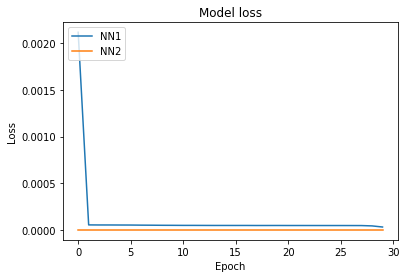

In [13]:
#BOTH NN SK


import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
Sx = Conv1D(128, kernel_size=1, activation="relu")(inputA)
Sx = Conv1D(64, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(32, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(24, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(13, kernel_size=1, activation="relu")(Sx)
Sx = Flatten()(Sx)
Sx = Dense(13, activation="relu")(Sx)
Sx = krs.Model(inputs=inputA, outputs=Sx)

print(Sx.output)

# the second branch opreates on the second input
Sy = Dense(3, activation="linear")(inputB)
Sy = krs.Model(inputs=inputB, outputs=Sy)

print(Sy.output)

# combine the output of the two branches
Scombined = krs.layers.concatenate([Sx.output, Sy.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
Sz = Dense(64, activation="relu")(Scombined)
Sz = Dense(32, activation="relu")(Sz)
Sz = Dense(24, activation="relu")(Sz)
Sz = Dense(13, activation="linear")(Sz)

# our model will accept the inputs of the two branches and
# then output a single value
SK_model = krs.Model(inputs=[Sx.input, Sy.input], outputs=Sz)
SK_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


SK_history = SK_model.fit( [SK_X,SK_Ls[:,:,0]], SK_Y, validation_data=([SK_X,SK_Ls[:,:,0]], SK_Y),
                        epochs=30, batch_size=32, verbose=1)  



##DIFFERENT NETWORK
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

inputA = krs.Input(shape=(7,))

z = Dense(128, activation="relu")(inputA)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(12, activation="relu")(z)
z = Dense(1, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
NN2_SK_model = krs.Model(inputs=inputA, outputs=z)
NN2_SK_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


NN2_SK_history = NN2_SK_model.fit( NN2_SK_X[:,:,0], NN2_SK_Y, validation_data=(NN2_SK_X[:,:,0], NN2_SK_Y),
                        epochs=30, batch_size=32, verbose=1)  
    
  
    
plt.figure()
# Plot training & validation loss values
plt.plot(SK_history.history['loss'],label = 'NN1')
plt.plot(NN2_SK_history.history['loss'],label = 'NN2')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Tensor("dense_19/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_20/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 70864 samples, validate on 70864 samples
Epoch 1/30
70864/70864 [==============================] - 12s 162us/step - loss: 335690.2401 - val_loss: 179903.1784
Epoch 2/30
70864/70864 [==============================] - 10s 140us/step - loss: 99710.2110 - val_loss: 65136.7891
Epoch 3/30
70864/70864 [==============================] - 10s 144us/step - loss: 57897.0634 - val_loss: 52208.0980
Epoch 4/30
70864/70864 [==============================] - 10s 147us/step - loss: 46699.3232 - val_loss: 41453.7671
Epoch 5/30
70864/70864 [==============================] - 10s 141us/step - loss: 39788.0299 - val_loss: 36897.8825
Epoch 6/30
70864/70864 [==============================] - 11s 152us/step - loss: 35775.1296 - val_loss: 33708.8623
Epoch 7/30
70864/70864 [==============================] - 10s 145us/step - loss: 33089.9667 - val_loss: 31396.8780
Epoch 8/30
70864/70864 [=====

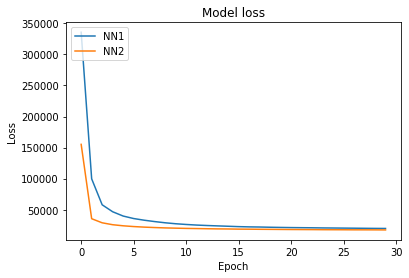

In [14]:
#BOTH NN MOMENT


import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
Sx = Conv1D(128, kernel_size=1, activation="relu")(inputA)
Sx = Conv1D(64, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(32, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(24, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(13, kernel_size=1, activation="relu")(Sx)
Sx = Flatten()(Sx)
Sx = Dense(13, activation="relu")(Sx)
Sx = krs.Model(inputs=inputA, outputs=Sx)

print(Sx.output)

# the second branch opreates on the second input
Sy = Dense(3, activation="linear")(inputB)
Sy = krs.Model(inputs=inputB, outputs=Sy)

print(Sy.output)

# combine the output of the two branches
Scombined = krs.layers.concatenate([Sx.output, Sy.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
Sz = Dense(64, activation="relu")(Scombined)
Sz = Dense(32, activation="relu")(Sz)
Sz = Dense(24, activation="relu")(Sz)
Sz = Dense(13, activation="linear")(Sz)

# our model will accept the inputs of the two branches and
# then output a single value
MOMENT_model = krs.Model(inputs=[Sx.input, Sy.input], outputs=Sz)
MOMENT_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


MOMENT_history = MOMENT_model.fit( [MOMENT_X,MOMENT_Ls[:,:,0]], MOMENT_Y, validation_data=([MOMENT_X,MOMENT_Ls[:,:,0]], MOMENT_Y),
                        epochs=30, batch_size=32, verbose=1)  



##DIFFERENT NETWORK
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

inputA = krs.Input(shape=(7,))

z = Dense(128, activation="relu")(inputA)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(12, activation="relu")(z)
z = Dense(1, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
NN2_MOMENT_model = krs.Model(inputs=inputA, outputs=z)
NN2_MOMENT_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


NN2_MOMENT_history = NN2_MOMENT_model.fit( NN2_MOMENT_X[:,:,0], NN2_MOMENT_Y, validation_data=(NN2_MOMENT_X[:,:,0], NN2_MOMENT_Y),
                        epochs=30, batch_size=32, verbose=1)  
    
  
    
plt.figure()
# Plot training & validation loss values
plt.plot(MOMENT_history.history['loss'],label = 'NN1')
plt.plot(NN2_MOMENT_history.history['loss'],label = 'NN2')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [15]:
#ORGINAL NN MOMENT
'''

import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value

MOMENT_model = krs.Model(inputs=[x.input, y.input], outputs=z)

MOMENT_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 

MOMENT_history = MOMENT_model.fit( [MOMENT_X,MOMENT_Ls[:,:,0]], MOMENT_Y, 
                                  validation_data=([MOMENT_X,MOMENT_Ls[:,:,0]],MOMENT_Y), epochs=100, batch_size=32, verbose=1) 
 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(MOMENT_history.history['loss'],label = 'MOMENT')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
'''

'\n\nimport keras as krs\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Conv1D, Flatten\nimport matplotlib.pyplot as plt\nfrom keras.utils import plot_model\n\n# define two sets of inputs\ninputA = krs.Input(shape=(13,1))\ninputB = krs.Input(shape=(3,))\n\n# the first branch operates on the first input\nx = Conv1D(128, kernel_size=1, activation="relu")(inputA)\nx = Conv1D(64, kernel_size=1, activation="relu")(x)\nx = Conv1D(32, kernel_size=1, activation="relu")(x)\nx = Conv1D(24, kernel_size=1, activation="relu")(x)\nx = Conv1D(13, kernel_size=1, activation="relu")(x)\nx = Flatten()(x)\nx = Dense(13, activation="relu")(x)\nx = krs.Model(inputs=inputA, outputs=x)\n\nprint(x.output)\n\n# the second branch opreates on the second input\ny = Dense(3, activation="linear")(inputB)\ny = krs.Model(inputs=inputB, outputs=y)\n\nprint(y.output)\n\n# combine the output of the two branches\ncombined = krs.layers.concatenate([x.output, y.output])\n\n# apply a FC layer and then 

In [16]:
'''
#NEW NN SK

import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

inputA = krs.Input(shape=(7,))

z = Dense(128, activation="relu")(inputA)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(12, activation="relu")(z)
z = Dense(1, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
NN2_SK_model = krs.Model(inputs=inputA, outputs=z)
NN2_SK_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


NN2_SK_history = NN2_SK_model.fit( NN2_SK_X[:,:,0], NN2_SK_Y, validation_data=(NN2_SK_X[:,:,0], NN2_SK_Y),
                        epochs=100, batch_size=32, verbose=1)  
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(NN2_SK_history.history['loss'],label = 'SK')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

'''

'\n#NEW NN SK\n\nimport keras as krs\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Conv1D, Flatten\nimport matplotlib.pyplot as plt\nfrom keras.utils import plot_model\n\ninputA = krs.Input(shape=(7,))\n\nz = Dense(128, activation="relu")(inputA)\nz = Dense(64, activation="relu")(z)\nz = Dense(32, activation="relu")(z)\nz = Dense(24, activation="relu")(z)\nz = Dense(12, activation="relu")(z)\nz = Dense(1, activation="linear")(z)\n\n# our model will accept the inputs of the two branches and\n# then output a single value\nNN2_SK_model = krs.Model(inputs=inputA, outputs=z)\nNN2_SK_model.compile(loss=\'mean_squared_error\', optimizer=krs.optimizers.adam(clipnorm=1)) \n\n\nNN2_SK_history = NN2_SK_model.fit( NN2_SK_X[:,:,0], NN2_SK_Y, validation_data=(NN2_SK_X[:,:,0], NN2_SK_Y),\n                        epochs=100, batch_size=32, verbose=1)  \n    \n    \nplt.figure()\n# Plot training & validation loss values\nplt.plot(NN2_SK_history.history[\'loss\'],label = \'SK\')\

In [ ]:
import time
from matplotlib.pyplot import figure


NN2_y_pred1 = NN2_SK_model.predict([NN2_SK_X[:,:,0]])
y_pred2 = SK_model.predict([SK_X,SK_Ls[:,:,0]])

for ii in range(20,40):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    
    NN2_pred=[]
    NN2_real=[]
    for i in range(13):
        NN2_pred.append(NN2_y_pred1[ii*13+i])
        NN2_real.append(NN2_SK_Y[ii*13+i])
        
    maximo = max([max(y_pred2[ii,:]),max(SK_Y[ii,:])])
    minimo = min([min(y_pred2[ii,:]),min(SK_Y[ii,:])])
        
    plt.plot(SK_Y[ii,:],label='orig')
    plt.plot(y_pred2[ii,:],label='NN')
    #plt.plot(NN2_real,label='orig2')
    plt.plot(NN2_pred,label='NN2')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.xlabel('size (m)')
    plt.ylabel('rotation (kN)')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(SK_X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(SK_Ls[ii,i,0]*SK_LPF[ii,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()
    
    print(SK_Y[0])

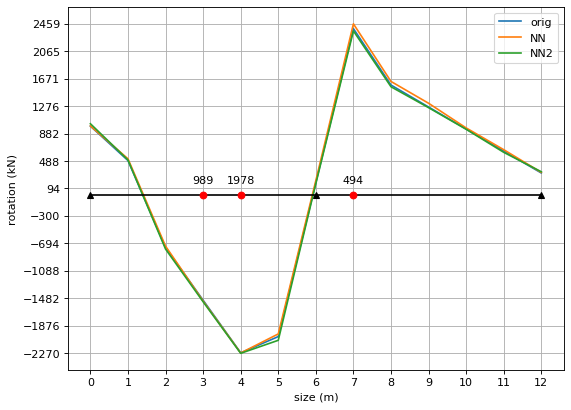

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


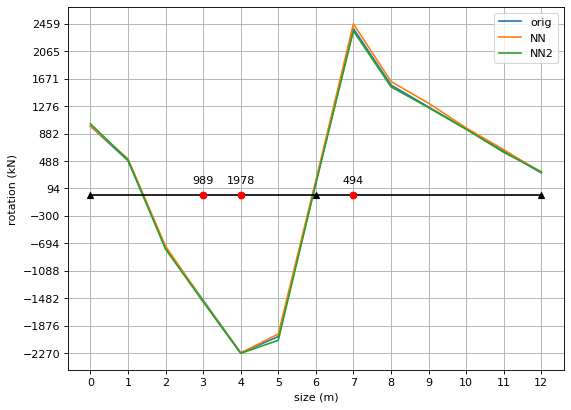

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


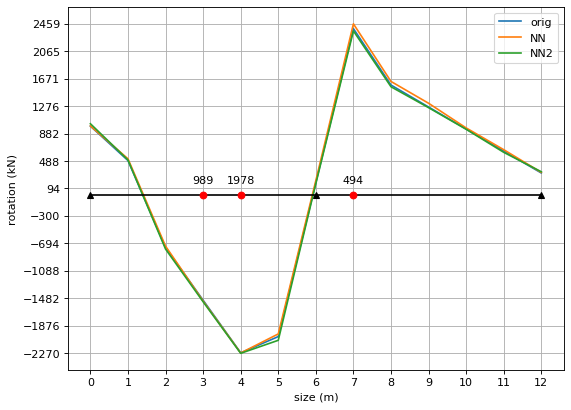

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


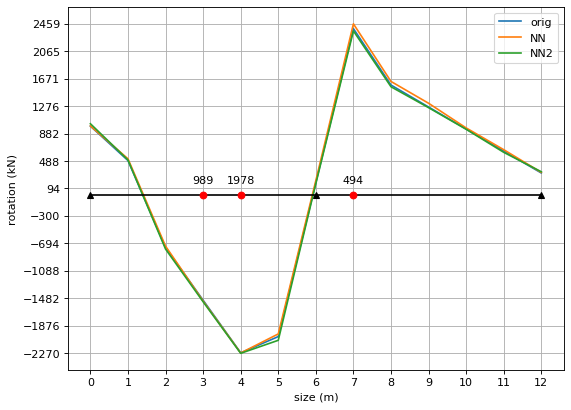

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


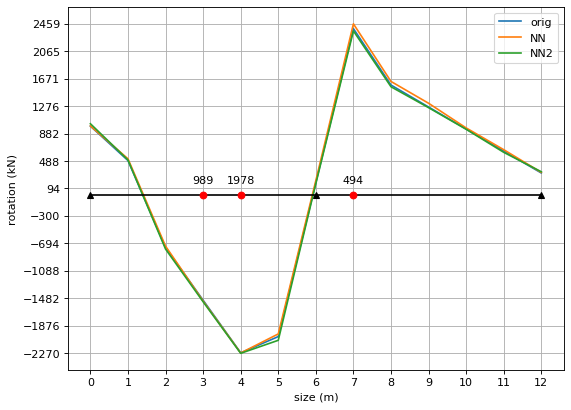

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


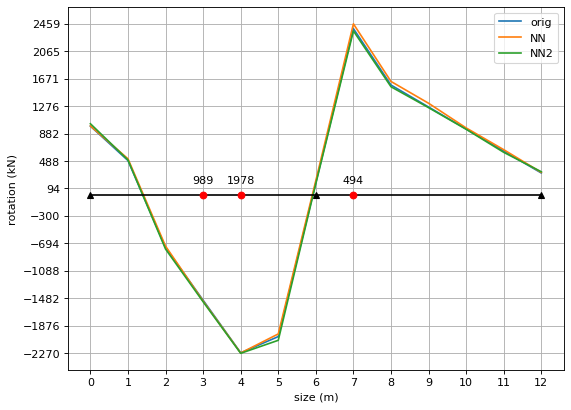

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


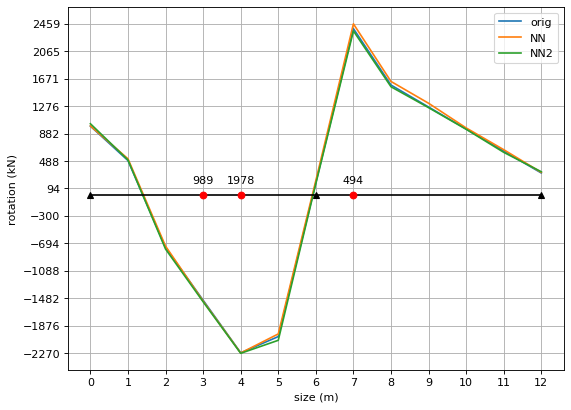

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


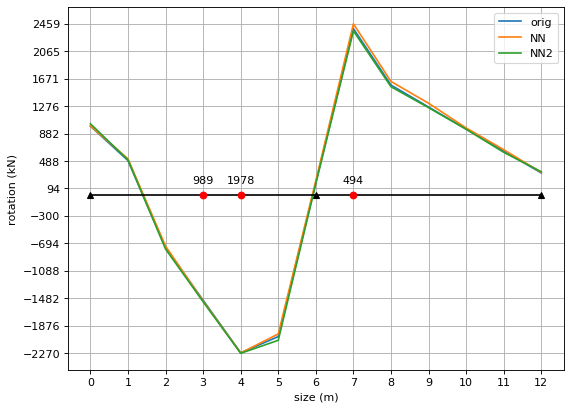

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


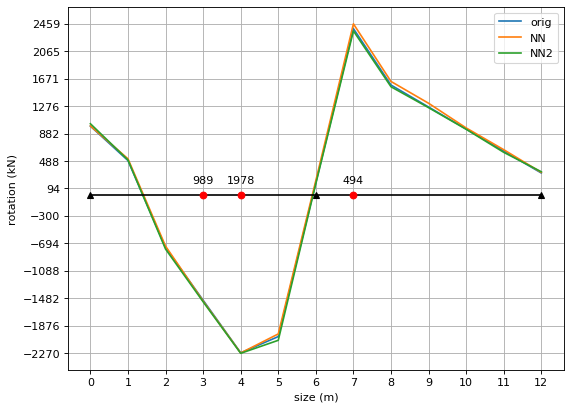

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


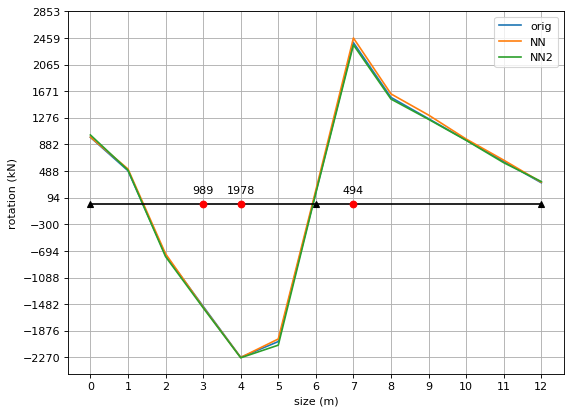

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


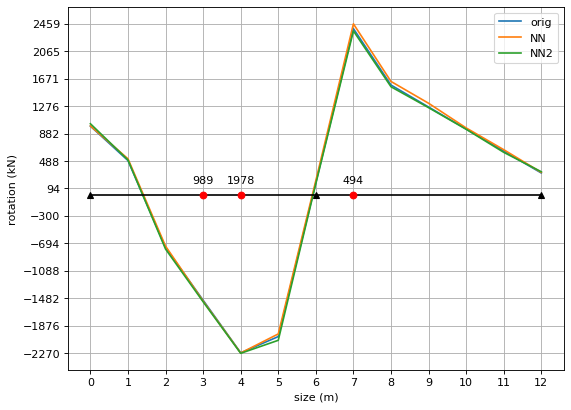

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


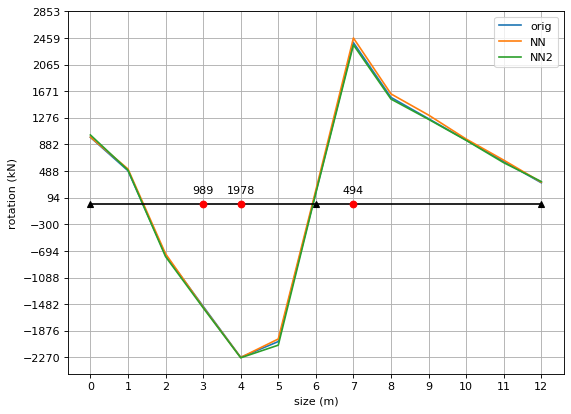

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


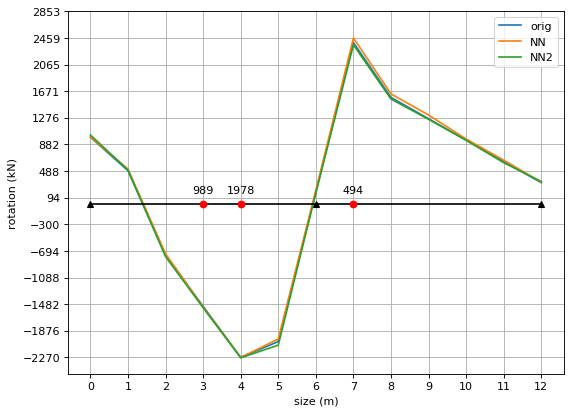

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


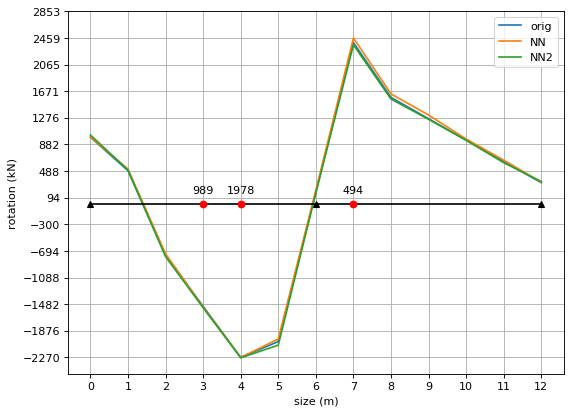

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


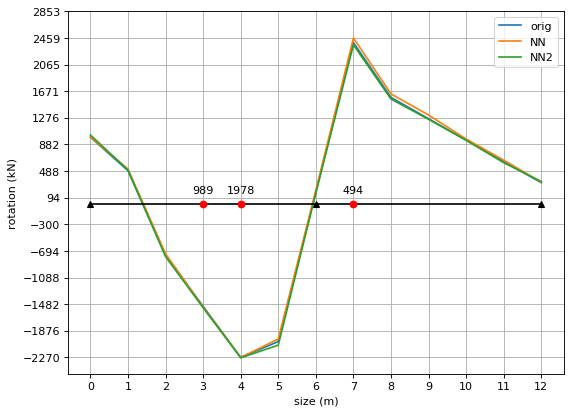

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


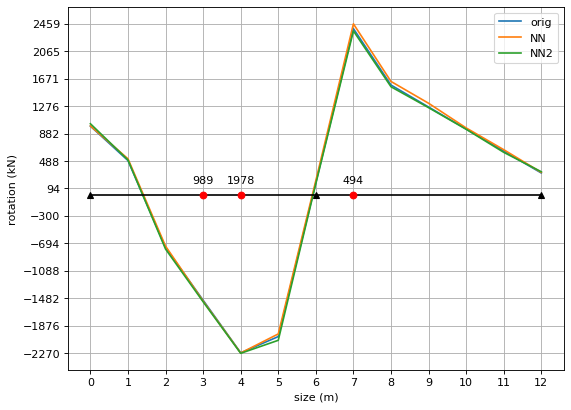

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


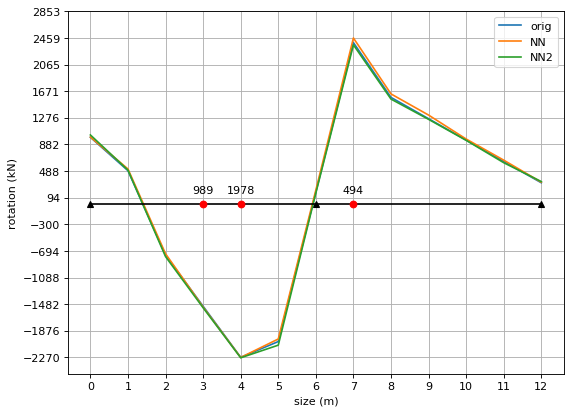

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


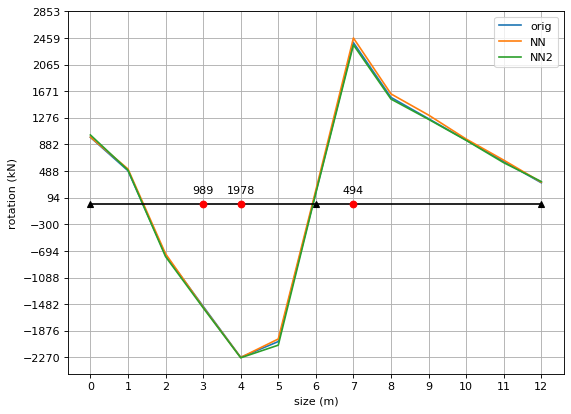

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


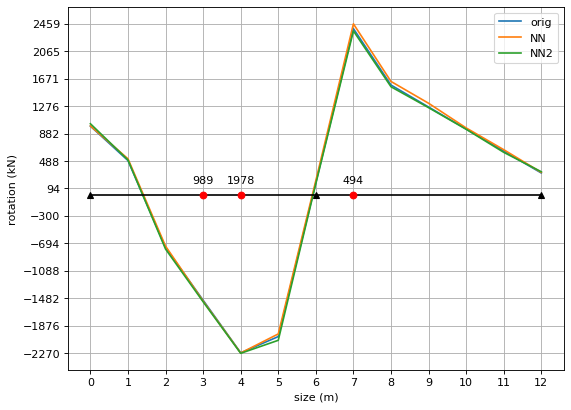

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


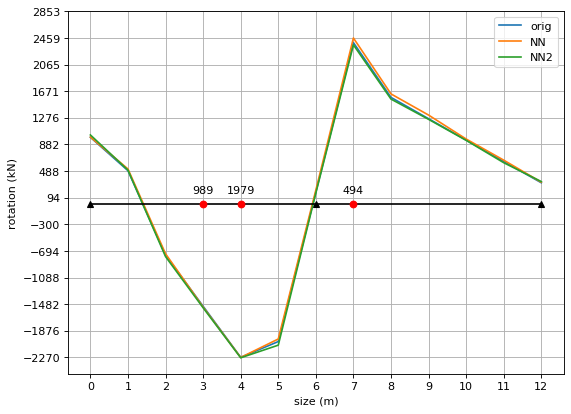

[    9.37577806    18.75155612 -1038.73       -1374.28
 -1709.83        -639.032        431.768       1502.57
    80.1803        64.1442        48.1081        32.0721
    16.036     ]


In [18]:
import time
from matplotlib.pyplot import figure


NN2_y_pred1 = NN2_MOMENT_model.predict([NN2_MOMENT_X[:,:,0]])
y_pred2 = MOMENT_model.predict([MOMENT_X,MOMENT_Ls[:,:,0]])

for ii in range(23220,23240):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    
    NN2_pred=[]
    NN2_real=[]
    for i in range(13):
        NN2_pred.append(NN2_y_pred1[ii*13+i])
        NN2_real.append(NN2_MOMENT_Y[ii*13+i])
        
    maximo = max([max(y_pred2[ii,:]),max(MOMENT_Y[ii,:])])
    minimo = min([min(y_pred2[ii,:]),min(MOMENT_Y[ii,:])])
        
    plt.plot(MOMENT_Y[ii,:],label='orig')
    plt.plot(y_pred2[ii,:],label='NN')
    #plt.plot(NN2_real,label='orig2')
    plt.plot(NN2_pred,label='NN2')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.xlabel('size (m)')
    plt.ylabel('rotation (kN)')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(MOMENT_X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(MOMENT_Ls[ii,i,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()
    
    print(MOMENT_Y[0])

In [20]:
#GET NN PREDICTIONS FOR THE 3 SCENARIOS

Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_05[i,0,0] = 30*(i+1)*0.01
    Pesos_05[i,1,0] = 30*(i+1)/2*0.01
    Pesos_05[i,2,0] = 30*(i+1)/2*0.01
    Pesos_1[i,0,0] = 30*(i+1)*0.01
    Pesos_1[i,1,0] = 30*(i+1)*0.01
    Pesos_1[i,2,0] = 30*(i+1)*0.01
    Pesos_2[i,0,0] = 30*(i+1)*0.01
    Pesos_2[i,1,0] = 30*(i+1)*2*0.01
    Pesos_2[i,2,0] = 30*(i+1)*2*0.01
    
    
Inc_MOMENT_05 = MOMENT_model.predict([Pos,Pesos_05[:,:,0]])
Inc_MOMENT_1 = MOMENT_model.predict([Pos,Pesos_1[:,:,0]])
Inc_MOMENT_2 = MOMENT_model.predict([Pos,Pesos_2[:,:,0]])
Inc_SK_05 = SK_model.predict([Pos,Pesos_05[:,:,0]])
Inc_SK_1 = SK_model.predict([Pos,Pesos_1[:,:,0]])
Inc_SK_2 = SK_model.predict([Pos,Pesos_2[:,:,0]])


In [21]:
#GET REAL RESULTS FOR THE 3 SCENARIOS

SK05 =  pd.read_csv('rotation_alpha05_beta05.csv', header=None)
SK1 =  pd.read_csv('rotation_alpha1_beta1.csv', header=None)
SK2 =  pd.read_csv('rotation_alpha2_beta2.csv', header=None)
MOMENT05 =  pd.read_csv('moment_alpha05_beta05.csv', header=None)
MOMENT1 =  pd.read_csv('moment_alpha1_beta1.csv', header=None)
MOMENT2 =  pd.read_csv('moment_alpha2_beta2.csv', header=None)

sk05=[]
sk1=[]
sk2=[]

moment05=[]
moment1=[]
moment2=[]

load05=[]
load1=[]
load2=[]

for i in range(0,13):
    sk05.append(SK05.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    sk1.append(SK1.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    sk2.append(SK2.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    
    moment05.append(MOMENT05.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    moment1.append(MOMENT1.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    moment2.append(MOMENT2.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    
    load05.append(int(SK05.iloc[i][3]*SK05.iloc[i][6]))
    load1.append(int(SK1.iloc[i][3]*SK1.iloc[i][6]))
    load2.append(int(SK2.iloc[i][3]*MOMENT2.iloc[i][6]))


###########################################################################################################
    

#PLOT THEM NEXT TO EACH OTHER
def make_graph(_xx,_var,sk,_load,_title):
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(0,13):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'r',label=str(_load[i])+'N-Rede') 
        plt.plot(_xx,sk[i],'b',label=str(_load[i])+'N-Original')

    
    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)
    
    plt.title(_title,fontsize=20)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    err =err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print('Posição \t Erro Relativo Médio')
    for i in range(13):
        print(str(i)+" metros \t"+str(err[i].round(2))+'%')
    
###########################################

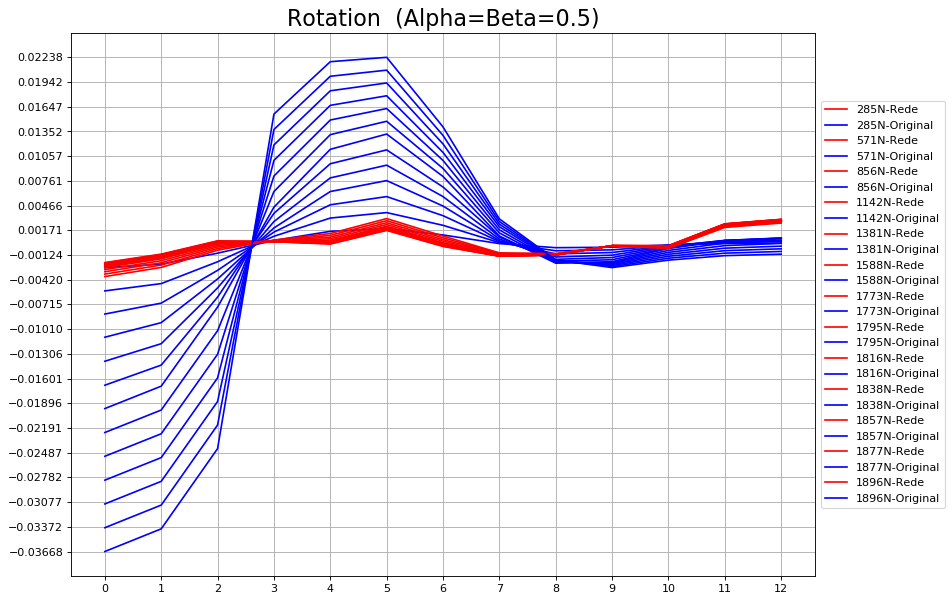

Posição 	 Erro Relativo Médio
0 metros 	85.45%
1 metros 	93.09%
2 metros 	115.9%
3 metros 	91.26%
4 metros 	104.2%
5 metros 	81.38%
6 metros 	108.98%
7 metros 	378.88%
8 metros 	58.29%
9 metros 	96.5%
10 metros 	71.96%
11 metros 	822.29%
12 metros 	788.89%


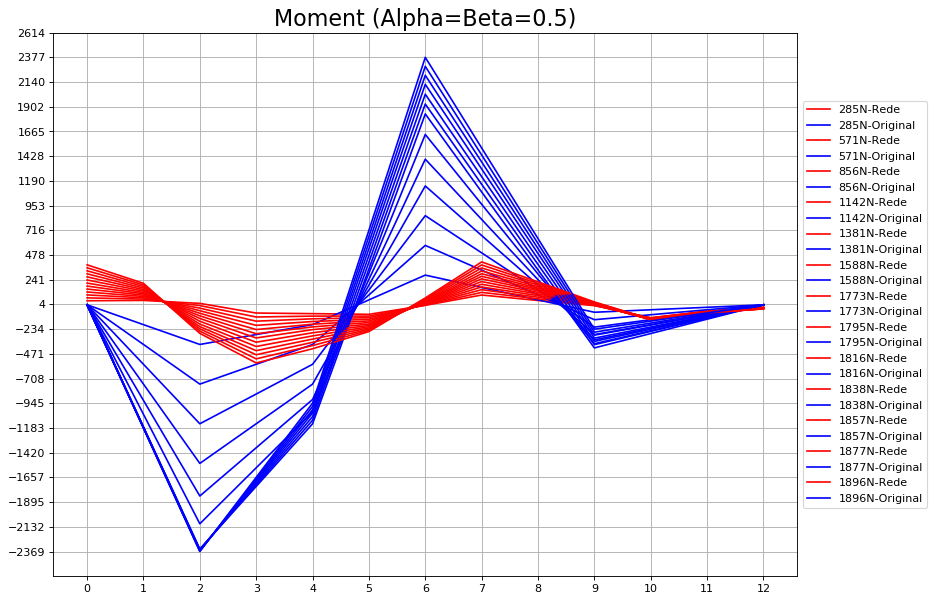

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	122.9%
2 metros 	102.15%
3 metros 	83.31%
4 metros 	76.35%
5 metros 	182.11%
6 metros 	107.26%
7 metros 	77.5%
8 metros 	59.72%
9 metros 	109.93%
10 metros 	45.41%
11 metros 	41.47%
12 metros 	inf%


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


In [22]:
make_graph(xticks,Inc_SK_05,sk05,load05,'Rotation  (Alpha=Beta=0.5)')
make_graph(xticks,Inc_MOMENT_05,moment05,load05,'Moment (Alpha=Beta=0.5)')


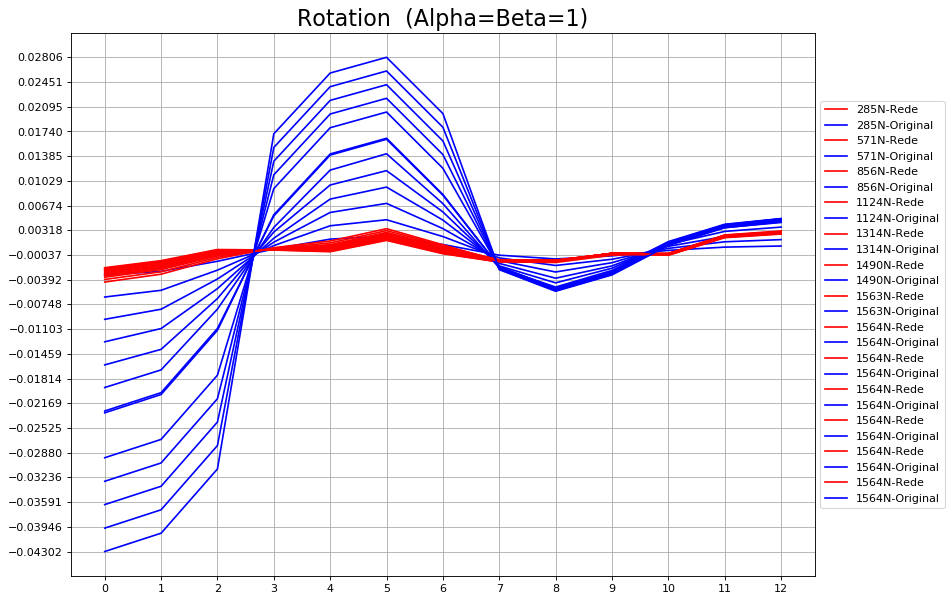

Posição 	 Erro Relativo Médio
0 metros 	87.06%
1 metros 	93.71%
2 metros 	112.38%
3 metros 	90.53%
4 metros 	103.05%
5 metros 	84.69%
6 metros 	106.79%
7 metros 	64.16%
8 metros 	73.65%
9 metros 	99.08%
10 metros 	135.38%
11 metros 	55.47%
12 metros 	55.37%


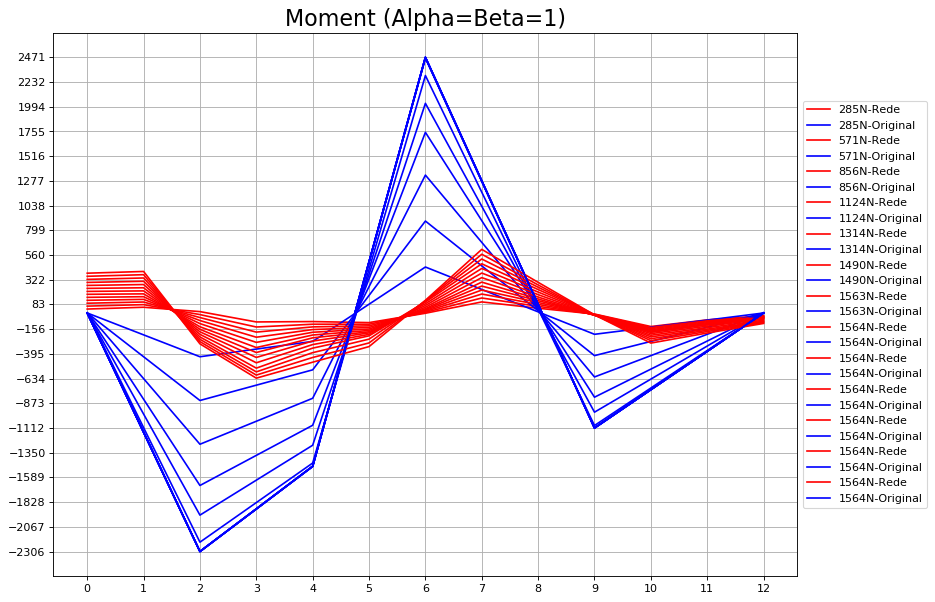

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	133.07%
2 metros 	101.04%
3 metros 	82.82%
4 metros 	85.39%
5 metros 	165.39%
6 metros 	105.55%
7 metros 	71.44%
8 metros 	210.45%
9 metros 	105.94%
10 metros 	67.81%
11 metros 	59.76%
12 metros 	inf%


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


In [23]:
make_graph(xticks,Inc_SK_1,sk1,load1,'Rotation  (Alpha=Beta=1)')
make_graph(xticks,Inc_MOMENT_1,moment1,load1,'Moment (Alpha=Beta=1)')

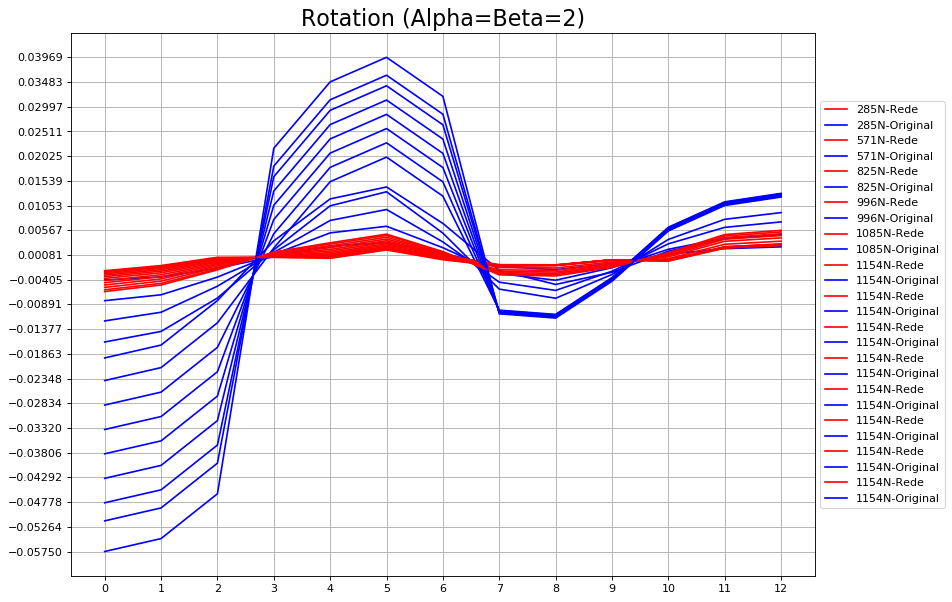

Posição 	 Erro Relativo Médio
0 metros 	88.34%
1 metros 	93.66%
2 metros 	107.81%
3 metros 	86.59%
4 metros 	100.32%
5 metros 	87.82%
6 metros 	104.44%
7 metros 	74.37%
8 metros 	82.81%
9 metros 	90.35%
10 metros 	107.66%
11 metros 	64.67%
12 metros 	63.75%


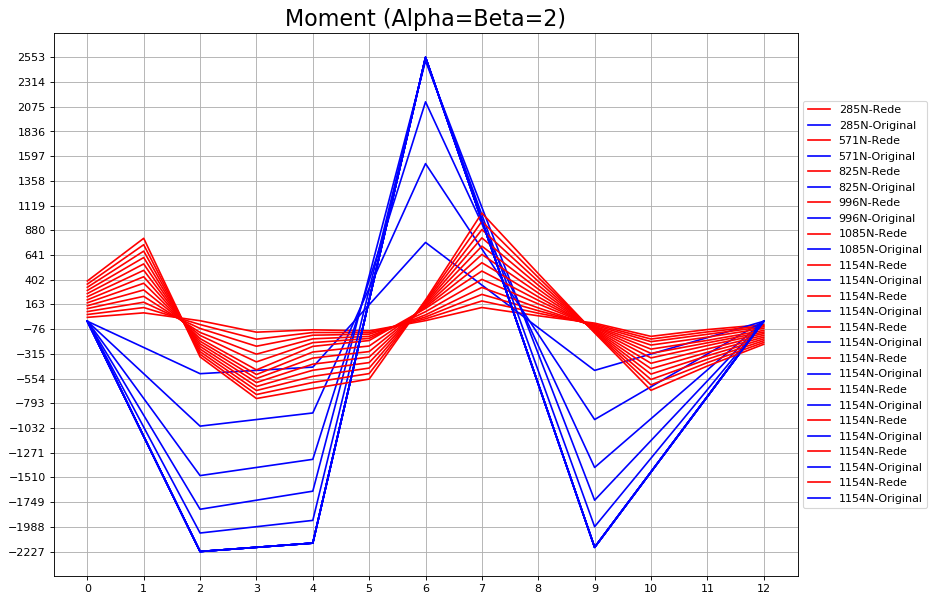

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	154.92%
2 metros 	99.03%
3 metros 	81.71%
4 metros 	89.31%
5 metros 	248.47%
6 metros 	103.16%
7 metros 	43.56%
8 metros 	166.64%
9 metros 	104.36%
10 metros 	74.88%
11 metros 	65.45%
12 metros 	inf%


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


In [24]:
make_graph(xticks,Inc_SK_2,sk2,load2,'Rotation (Alpha=Beta=2)')
make_graph(xticks,Inc_MOMENT_2,moment2,load2,'Moment (Alpha=Beta=2)')

In [25]:
#GET BOTH REAL RESULTS AND NN PREDICTION FOR THE MOMENT AND ROTATION IN THE ROTULA POINTS

Numero_iteracoes=13
Passo=30

momento_apoio_05=[]
rotacao_apoio_05=[]
momento_carga_05=[]
rotacao_carga_05=[]
momento_carga2_05=[]
rotacao_carga2_05=[]
momento_meiovao2_05=[]
rotacao_meiovao2_05=[]
momento_apoio_orig_05=[]
rotacao_apoio_orig_05=[]
momento_carga_orig_05=[]
rotacao_carga_orig_05=[]
momento_carga2_orig_05=[]
rotacao_carga2_orig_05=[]
momento_meiovao2_orig_05=[]
rotacao_meiovao2_orig_05=[]



momento_apoio_1=[]
rotacao_apoio_1=[]
momento_carga_1=[]
rotacao_carga_1=[]
momento_carga2_1=[]
rotacao_carga2_1=[]
momento_meiovao2_1=[]
rotacao_meiovao2_1=[]
momento_apoio_orig_1=[]
rotacao_apoio_orig_1=[]
momento_carga_orig_1=[]
rotacao_carga_orig_1=[]
momento_carga2_orig_1=[]
rotacao_carga2_orig_1=[]
momento_meiovao2_orig_1=[]
rotacao_meiovao2_orig_1=[]



momento_apoio_2=[]
rotacao_apoio_2=[]
momento_carga_2=[]
rotacao_carga_2=[]
momento_carga2_2=[]
rotacao_carga2_2=[]
momento_meiovao2_2=[]
rotacao_meiovao2_2=[]
momento_apoio_orig_2=[]
rotacao_apoio_orig_2=[]
momento_carga_orig_2=[]
rotacao_carga_orig_2=[]
momento_carga2_orig_2=[]
rotacao_carga2_orig_2=[]
momento_meiovao2_orig_2=[]
rotacao_meiovao2_orig_2=[]




for i in range(0,Numero_iteracoes):
   
    momento_carga_05.append(Inc_MOMENT_05[i][2])
    rotacao_carga_05.append(Inc_SK_05[i][2])

    momento_carga2_05.append(Inc_MOMENT_05[i][4])
    rotacao_carga2_05.append(Inc_SK_1[i][4])

    momento_apoio_05.append(Inc_MOMENT_05[i][6])
    rotacao_apoio_05.append(Inc_SK_05[i][6])
    
    momento_meiovao2_05.append(Inc_MOMENT_05[i][9])
    rotacao_meiovao2_05.append(Inc_SK_05[i][9])
    
    momento_carga_orig_05.append(moment05[i][13])
    rotacao_carga_orig_05.append(sk05[i][10])
    momento_carga2_orig_05.append(moment05[i][19])
    rotacao_carga2_orig_05.append(sk05[i][14])

    momento_apoio_orig_05.append(moment05[i][25])
    rotacao_apoio_orig_05.append(sk05[i][20])
    
    momento_meiovao2_orig_05.append(moment05[i][34])
    rotacao_meiovao2_orig_05.append(sk05[i][26])
    

    
     
    
    momento_carga_1.append(Inc_MOMENT_1[i][2])
    rotacao_carga_1.append(Inc_SK_1[i][2])

    momento_carga2_1.append(Inc_MOMENT_1[i][4])
    rotacao_carga2_1.append(Inc_SK_1[i][4])

    momento_apoio_1.append(Inc_MOMENT_1[i][6])
    rotacao_apoio_1.append(Inc_SK_1[i][6])
    
    momento_meiovao2_1.append(Inc_MOMENT_1[i][9])
    rotacao_meiovao2_1.append(Inc_SK_1[i][9])
    
    momento_carga_orig_1.append(moment1[i][13])
    rotacao_carga_orig_1.append(sk1[i][10])
    momento_carga2_orig_1.append(moment1[i][19])
    rotacao_carga2_orig_1.append(sk1[i][14])

    momento_apoio_orig_1.append(moment1[i][25])
    rotacao_apoio_orig_1.append(sk1[i][20])
    
    momento_meiovao2_orig_1.append(moment1[i][34])
    rotacao_meiovao2_orig_1.append(sk1[i][26])
    
    

      
    momento_carga_2.append(Inc_MOMENT_2[i][2])
    rotacao_carga_2.append(Inc_SK_2[i][2])

    momento_carga2_2.append(Inc_MOMENT_2[i][4])
    rotacao_carga2_2.append(Inc_SK_2[i][4])

    momento_apoio_2.append(Inc_MOMENT_2[i][6])
    rotacao_apoio_2.append(Inc_SK_2[i][6])
    
    momento_meiovao2_2.append(Inc_MOMENT_2[i][9])
    rotacao_meiovao2_2.append(Inc_SK_2[i][9])
    
    momento_carga_orig_2.append(moment2[i][13])
    rotacao_carga_orig_2.append(sk2[i][10])
    momento_carga2_orig_2.append(moment2[i][19])
    rotacao_carga2_orig_2.append(sk2[i][14])

    momento_apoio_orig_2.append(moment2[i][25])
    rotacao_apoio_orig_2.append(sk2[i][20])
    
    momento_meiovao2_orig_2.append(moment2[i][34])
    rotacao_meiovao2_orig_2.append(sk2[i][26])
    

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def make_graph_MxR(rotacao,momento,rotacao_orig, momento_orig,_load,title):

    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


    plt.plot(rotacao,momento,label='NN') 
    plt.plot(rotacao_orig,momento_orig,label='Original')
    plt.legend()
    plt.grid()
    
    plt.xlabel('rotation')
    plt.ylabel('moment')
    plt.title(title)
    stepd=(max(max(momento),max(momento_orig)) - min(min(momento),min(momento_orig)))/10.0
    plt.yticks(np.arange(min(min(momento),min(momento_orig)), max(max(momento),max(momento_orig))+stepd ,step=stepd))

    stepd=(max(max(rotacao),max(rotacao_orig)) - min(min(rotacao),min(rotacao_orig)))/10.0
    plt.xticks(np.arange(min(min(rotacao),min(rotacao_orig)), max(max(rotacao),max(rotacao_orig))+stepd ,step=stepd))


    for i in range(0,Numero_iteracoes):
        #label=int((i+1)*Passo)
        plt.annotate(_load[i], # this is the text
                 (rotacao[i],momento[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='blue')
        plt.annotate(_load[i], # this is the text
                 (rotacao_orig[i],momento_orig[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='red')

In [ ]:
make_graph_MxR(rotacao_carga_05,momento_carga_05,rotacao_carga_orig_05,momento_carga_orig_05,load05,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_MxR(rotacao_carga2_05,momento_carga2_05,rotacao_carga2_orig_05,momento_carga2_orig_05,load05,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_MxR(rotacao_apoio_05,momento_apoio_05,rotacao_apoio_orig_05,momento_apoio_orig_05,load05,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_MxR(rotacao_meiovao2_05,momento_meiovao2_05,rotacao_meiovao2_orig_05,momento_meiovao2_orig_05,load05,'MOMENTO VS ROTACAO - Pos 9metros')

In [ ]:
make_graph_MxR(rotacao_carga_1,momento_carga_1,rotacao_carga_orig_1,momento_carga_orig_1,load1,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_MxR(rotacao_carga2_1,momento_carga2_1,rotacao_carga2_orig_1,momento_carga2_orig_1,load1,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_MxR(rotacao_apoio_1,momento_apoio_1,rotacao_apoio_orig_1,momento_apoio_orig_1,load1,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_MxR(rotacao_meiovao2_1,momento_meiovao2_1,rotacao_meiovao2_orig_1,momento_meiovao2_orig_1,load1,'MOMENTO VS ROTACAO - Pos 9metros')

In [ ]:
make_graph_MxR(rotacao_carga_2,momento_carga_2,rotacao_carga_orig_2,momento_carga_orig_2,load2,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_MxR(rotacao_carga2_2,momento_carga2_2,rotacao_carga2_orig_2,momento_carga2_orig_2,load2,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_MxR(rotacao_apoio_2,momento_apoio_2,rotacao_apoio_orig_2,momento_apoio_orig_2,load2,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_MxR(rotacao_meiovao2_2,momento_meiovao2_2,rotacao_meiovao2_orig_2,momento_meiovao2_orig_2,load2,'MOMENTO VS ROTACAO - Pos 9metros')

In [ ]:
begin=time.time()
for i in range(10):
    print(i)
end=time.time()

print(end-begin)

In [ ]:
#TEST TIME

begin=time.time()
Pos = np.zeros((20,13,1))
Pesos_1 = np.zeros((20,3,1))


for i in range(20):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_1[i,0,0] = 30*(i+1)*0.01
    Pesos_1[i,1,0] = 30*(i+1)*0.01
    Pesos_1[i,2,0] = 30*(i+1)*0.01

    
moment_pred = MOMENT_model.predict([Pos,Pesos_1[:,:,0]])
rotation_pred = SK_model.predict([Pos,Pesos_1[:,:,0]])

print(moment_pred)
print(rotation_pred)


end=time.time()

print(end-begin)



In [ ]:
325.196/0.007